###### Import Libraries

In [410]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import f_oneway
%matplotlib inline

from sklearn import metrics
from sklearn.metrics import make_scorer
from sklearn.preprocessing import LabelEncoder,StandardScaler

from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
import timeit
import warnings
warnings.filterwarnings('ignore')


###### Load Dataset

In [411]:
start = timeit.default_timer()
pd.pandas.set_option('display.max_columns',None)
df=pd.read_csv('E:\Data Trained_ Training\Project-Housing_splitted\\train.csv')
dftest=pd.read_csv("E:\Data Trained_ Training\Project-Housing_splitted\\test.csv")
stop = timeit.default_timer()
print(stop - start)

0.0549819000007119


###### Dimension of Dataset

In [412]:
df.shape

(1168, 81)

Observation :
IN this dataset there are 1168 rows and 81 columns

In [413]:
dftest.shape

(292, 80)

Observation : IN this dataset there are 292 rows and 80 columns

###### Sample of Dataset

In [414]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  127         120       RL          NaN     4928   Pave   NaN      IR1   
1  889          20       RL         95.0    15865   Pave   NaN      IR1   
2  793          60       RL         92.0     9920   Pave   NaN      IR1   
3  110          20       RL        105.0    11751   Pave   NaN      IR1   
4  422          20       RL          NaN    16635   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      NPkVill       Norm   
1         Lvl    AllPub    Inside       Mod        NAmes       Norm   
2         Lvl    AllPub   CulDSac       Gtl      NoRidge       Norm   
3         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
4         Lvl    AllPub       FR2       Gtl       NWAmes       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm   TwnhsE     1Story            6            5       1976   
1       Norm     1Fam     1Story            8            6       1970   
2       Norm     1Fam     2Story            7            5       1996   
3       Norm     1Fam     1Story            6            6       1977   
4       Norm     1Fam     1Story            6            7       1977   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1976     Gable  CompShg     Plywood     Plywood       None   
1          1970      Flat  Tar&Grv     Wd Sdng     Wd Sdng       None   
2          1997     Gable  CompShg     MetalSd     MetalSd       None   
3          1977       Hip  CompShg     Plywood     Plywood    BrkFace   
4          2000     Gable  CompShg     CemntBd     CmentBd      Stone   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       Gd       TA           No   
1         0.0        Gd        Gd      PConc       TA       Gd           Gd   
2         0.0        Gd        TA      PConc       Gd       TA           Av   
3       480.0        TA        TA     CBlock       Gd       TA           No   
4       126.0        Gd        TA     CBlock       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          ALQ         120          Unf           0        958         1078   
1          ALQ         351          Rec         823       1043         2217   
2          GLQ         862          Unf           0        255         1117   
3          BLQ         705          Unf           0       1139         1844   
4          ALQ        1246          Unf           0        356         1602   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       958         0             0   
1    GasA        Ex          Y      SBrkr      2217         0             0   
2    GasA        Ex          Y      SBrkr      1127       886             0   
3    GasA        Ex          Y      SBrkr      1844         0             0   
4    GasA        Gd          Y      SBrkr      1602         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        958             0             0         2         0             2   
1       2217             1             0         2         0             4   
2       2013             1             0         2         1             3   
3       1844             0             0         2         0             3   
4       1602             0             1         2         0             3   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           1          TA   
1             1          Gd             8        Typ           1          TA   
2             1          TA             8        Typ           1          TA   
3             1          TA       

In [415]:
dftest.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   337          20       RL         86.0    14157   Pave   NaN      IR1   
1  1018         120       RL          NaN     5814   Pave   NaN      IR1   
2   929          20       RL          NaN    11838   Pave   NaN      Reg   
3  1148          70       RL         75.0    12000   Pave   NaN      Reg   
4  1227          60       RL         86.0    14598   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         HLS    AllPub    Corner       Gtl      StoneBr       Norm   
1         Lvl    AllPub   CulDSac       Gtl      StoneBr       Norm   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Bnk    AllPub    Inside       Gtl      Crawfor       Norm   
4         Lvl    AllPub   CulDSac       Gtl      Somerst      Feedr   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            9            5       2005   
1       Norm   TwnhsE     1Story            8            5       1984   
2       Norm     1Fam     1Story            8            5       2001   
3       Norm     1Fam     2Story            7            7       1941   
4       Norm     1Fam     2Story            6            5       2007   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2006       Hip  CompShg     VinylSd     VinylSd      Stone   
1          1984     Gable  CompShg     HdBoard     HdBoard       None   
2          2001       Hip  CompShg     VinylSd     VinylSd       None   
3          1950     Gable  CompShg     MetalSd     MetalSd       None   
4          2007     Gable  CompShg     VinylSd     VinylSd      Stone   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       200.0        Gd        TA      PConc       Ex       TA           Gd   
1         0.0        Gd        TA     CBlock       Gd       TA           Av   
2         0.0        Gd        TA      PConc       Gd       TA           Av   
3         0.0        TA        TA     CBlock       TA       TA           No   
4        74.0        Gd        TA      PConc       Gd       TA           Mn   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ        1249          Unf           0        673         1922   
1          GLQ        1036          Unf           0        184         1220   
2          Unf           0          Unf           0       1753         1753   
3          Rec         275          Unf           0        429          704   
4          Unf           0          Unf           0        894          894   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr      1922         0             0   
1    GasA        Gd          Y      SBrkr      1360         0             0   
2    GasA        Ex          Y      SBrkr      1788         0             0   
3    GasA        Ex          Y      SBrkr       860       704             0   
4    GasA        Ex          Y      SBrkr       894      1039             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1922             1             0         2         0             3   
1       1360             1             0         1         0             1   
2       1788             0             0         2         0             3   
3       1564             0             0         1         1             3   
4       1933             0             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           1          Gd   
1             1          Gd             4        Typ           1          Ex   
2             1          Ex             7        Typ           1          TA   
3             1          Fa  

###### Breif Infomation About Data

In [416]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

Observation :
In this dataset there are 3 float type columns, 35 int type columns, 43 object type columns
every columns not have 1168 non null value so there are Nan value

In [417]:
dftest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             292 non-null    int64  
 1   MSSubClass     292 non-null    int64  
 2   MSZoning       292 non-null    object 
 3   LotFrontage    247 non-null    float64
 4   LotArea        292 non-null    int64  
 5   Street         292 non-null    object 
 6   Alley          14 non-null     object 
 7   LotShape       292 non-null    object 
 8   LandContour    292 non-null    object 
 9   Utilities      292 non-null    object 
 10  LotConfig      292 non-null    object 
 11  LandSlope      292 non-null    object 
 12  Neighborhood   292 non-null    object 
 13  Condition1     292 non-null    object 
 14  Condition2     292 non-null    object 
 15  BldgType       292 non-null    object 
 16  HouseStyle     292 non-null    object 
 17  OverallQual    292 non-null    int64  
 18  OverallCon

Observation : In this dataset there are 4 float type columns, 34 int type columns, 42 object type columns every columns not have 1168 non null value so there are Nan value

###### Statistical Summary of Data

In [418]:
#for numerical variable

In [419]:
df.describe(exclude='object')

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1168.000000  1168.000000    954.00000    1168.000000  1168.000000   
mean    724.136130    56.767979     70.98847   10484.749144     6.104452   
std     416.159877    41.940650     24.82875    8957.442311     1.390153   
min       1.000000    20.000000     21.00000    1300.000000     1.000000   
25%     360.500000    20.000000     60.00000    7621.500000     5.000000   
50%     714.500000    50.000000     70.00000    9522.500000     6.000000   
75%    1079.500000    70.000000     80.00000   11515.500000     7.000000   
max    1460.000000   190.000000    313.00000  164660.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1168.000000  1168.000000   1168.000000  1161.000000  1168.000000   
mean      5.595890  1970.930651   1984.758562   102.310078   444.726027   
std       1.124343    30.145255     20.785185   182.595606   462.664785   
min       1.000000  1875.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1966.000000     0.000000     0.000000   
50%       5.000000  1972.000000   1993.000000     0.000000   385.500000   
75%       6.000000  2000.000000   2004.000000   160.000000   714.500000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1168.000000  1168.000000  1168.000000  1168.000000  1168.000000   
mean     46.647260   569.721747  1061.095034  1169.860445   348.826199   
std     163.520016   449.375525   442.272249   391.161983   439.696370   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   216.000000   799.000000   892.000000     0.000000   
50%       0.000000   474.000000  1005.500000  1096.500000     0.000000   
75%       0.000000   816.000000  1291.500000  1392.000000   729.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1168.000000  1168.000000   1168.000000   1168.000000  1168.000000   
mean       6.380137  1525.066781      0.425514      0.055651     1.562500   
std       50.892844   528.042957      0.521615      0.236699     0.551882   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1143.250000      0.000000      0.000000     1.000000   
50%        0.000000  1468.500000      0.000000      0.000000     2.000000   
75%        0.000000  1795.000000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1168.000000   1168.000000   1168.000000   1168.000000  1168.000000   
mean      0.388699      2.884418      1.045377      6.542808     0.617295   
std       0.504929      0.817229      0.216292      1.598484     0.650575   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1104.000000  1168.000000  1168.000000  1168.000000  1168.000000   
mean   1978.193841     1.776541   476.860445    96.206336    46.559932   
std      24.890704     0.745554   214.466769   126.158988    66.381023   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   338.000000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    24.000000   
75%    2002.000000     2.000000   576.000000   171.000000    70.000000   
max    2

In [420]:
dftest.describe(exclude='object')

Id  MSSubClass  LotFrontage        LotArea  OverallQual  \
count   292.000000  292.000000   247.000000     292.000000   292.000000   
mean    755.955479   57.414384    66.425101   10645.143836     6.078767   
std     442.565228   43.780649    21.726343   13330.669795     1.356147   
min       6.000000   20.000000    21.000000    1526.000000     3.000000   
25%     377.750000   20.000000    53.500000    7200.000000     5.000000   
50%     778.000000   50.000000    65.000000    9200.000000     6.000000   
75%    1152.250000   70.000000    79.000000   11658.750000     7.000000   
max    1456.000000  190.000000   150.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count   292.000000   292.000000    292.000000   291.000000   292.000000   
mean      5.493151  1972.616438   1985.294521   109.171821   439.294521   
std       1.063267    30.447016     20.105792   175.030021   429.559675   
min       3.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1968.000000     0.000000     0.000000   
50%       5.000000  1976.000000   1994.000000     0.000000   369.500000   
75%       6.000000  2001.000000   2003.250000   180.000000   700.500000   
max       9.000000  2009.000000   2010.000000  1031.000000  1767.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count   292.000000   292.000000   292.000000   292.000000   292.000000   
mean     46.157534   557.315068  1042.767123  1133.691781   339.657534   
std     152.467119   411.043768   424.561153   366.941919   424.278825   
min       0.000000     0.000000     0.000000   372.000000     0.000000   
25%       0.000000   255.000000   771.750000   858.000000     0.000000   
50%       0.000000   487.000000   971.000000  1047.500000     0.000000   
75%       0.000000   780.000000  1322.000000  1370.500000   717.000000   
max    1085.000000  1935.000000  3094.000000  2402.000000  1589.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath    FullBath  \
count    292.000000   292.000000    292.000000    292.000000  292.000000   
mean       3.702055  1477.051370      0.424658      0.065068    1.575342   
std       38.219527   514.199429      0.508831      0.247070    0.547856   
min        0.000000   520.000000      0.000000      0.000000    0.000000   
25%        0.000000  1061.500000      0.000000      0.000000    1.000000   
50%        0.000000  1440.000000      0.000000      0.000000    2.000000   
75%        0.000000  1720.250000      1.000000      0.000000    2.000000   
max      479.000000  3447.000000      2.000000      1.000000    3.000000   

         HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
count  292.000000    292.000000     292.00000    292.000000  292.000000   
mean     0.359589      2.794521       1.05137      6.417808    0.595890   
std      0.494795      0.807336       0.23616      1.728105    0.621259   
min      0.000000      0.000000       1.00000      3.000000    0.000000   
25%      0.000000      2.000000       1.00000      5.000000    0.000000   
50%      0.000000      3.000000       1.00000      6.000000    1.000000   
75%      1.000000      3.000000       1.00000      7.000000    1.000000   
max      2.000000      6.000000       3.00000     12.000000    2.000000   

       GarageYrBlt  GarageCars   GarageArea  WoodDeckSF  OpenPorchSF  \
count   275.000000  292.000000   292.000000  292.000000   292.000000   
mean   1979.760000    1.729452   457.458904   86.397260    47.061644   
std      23.868875    0.754430   210.785591  121.898836    65.865449   
min    1916.000000    0.000000     0.000000    0.000000     0.000000   
25%    1964.000000    1.000000   300.000000    0.000000     0.000000   
50%    1979.000000    2.000000   467.500000    0.000000    28.500000   
75%    2003.000000    2.000000   569.750000  149.250000    66.000000   
max    2010.000000    4.000000  1052.000000  728.000000   41

In [421]:
#for Categorical variable

In [422]:
df.describe(include=[object])

MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
count      1168   1168    77     1168        1168      1168      1168   
unique        5      2     2        4           4         1         5   
top          RL   Pave  Grvl      Reg         Lvl    AllPub    Inside   
freq        928   1164    41      740        1046      1168       842   

       LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
count       1168         1168       1168       1168     1168       1168   
unique         3           25          9          8        5          8   
top          Gtl        NAmes       Norm       Norm     1Fam     1Story   
freq        1105          182       1005       1154      981        578   

       RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual  \
count       1168     1168        1168        1168       1161      1168   
unique         6        8          14          15          4         4   
top        Gable  CompShg     VinylSd     VinylSd       None        TA   
freq         915     1144         396         387        696       717   

       ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
count       1168       1168     1138     1138         1137         1138   
unique         5          6        4        4            4            6   
top           TA     CBlock       TA       TA           No          Unf   
freq        1022        516      517     1041          756          345   

       BsmtFinType2 Heating HeatingQC CentralAir Electrical KitchenQual  \
count          1137    1168      1168       1168       1168        1168   
unique            6       6         5          2          5           4   
top             Unf    GasA        Ex          Y      SBrkr          TA   
freq           1002    1143       585       1090       1070         578   

       Functional FireplaceQu GarageType GarageFinish GarageQual GarageCond  \
count        1168         617       1104         1104       1104       1104   
unique          7           5          6            3          5          5   
top           Typ          Gd     Attchd          Unf         TA         TA   
freq         1085         301        691          487       1050       1061   

       PavedDrive PoolQC  Fence MiscFeature SaleType SaleCondition  
count        1168      7    237          44     1168          1168  
unique          3      3      4           4        9             6  
top             Y     Gd  MnPrv        Shed       WD        Normal  
freq         1071      3    129          40      999           945

In [423]:
dftest.describe(include=[object])

MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
count       292    292    14      292         292       292       292   
unique        4      2     2        4           4         2         5   
top          RL   Pave  Grvl      Reg         Lvl    AllPub    Inside   
freq        223    290     9      185         265       291       210   

       LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
count        292          292        292        292      292        292   
unique         3           24          8          2        5          8   
top          Gtl        NAmes       Norm       Norm     1Fam     1Story   
freq         277           43        255        291      239        148   

       RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual  \
count        292      292         292         292        291       292   
unique         5        3          12          14          4         4   
top        Gable  CompShg     VinylSd     VinylSd       None        TA   
freq         226      290         119         117        168       189   

       ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
count        292        292      285      285          285          285   
unique         4          6        4        3            4            6   
top           TA      PConc       TA       TA           No          GLQ   
freq         260        134      132      270          197           88   

       BsmtFinType2 Heating HeatingQC CentralAir Electrical KitchenQual  \
count           285     292       292        292        291         292   
unique            6       4         4          2          4           4   
top             Unf    GasA        Ex          Y      SBrkr          TA   
freq            254     285       156        275        264         157   

       Functional FireplaceQu GarageType GarageFinish GarageQual GarageCond  \
count         292         153        275          275        275        275   
unique          6           5          6            3          5          5   
top           Typ          Gd     Attchd          Unf         TA         TA   
freq          275          79        179          118        261        265   

       PavedDrive  Fence MiscFeature SaleType SaleCondition  
count         292     44          10      292           292  
unique          3      4           2        6             4  
top             Y  MnPrv        Shed       WD        Normal  
freq          269     28           9      268           253

###### check for unique values in columns

In [424]:
#pd.pandas.set_option('display.max_rows',None)
df.nunique()

Id               1168
MSSubClass         15
MSZoning            5
LotFrontage       106
LotArea           892
Street              2
Alley               2
LotShape            4
LandContour         4
Utilities           1
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          8
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
YearBuilt         110
YearRemodAdd       61
RoofStyle           6
RoofMatl            8
Exterior1st        14
Exterior2nd        15
MasVnrType          4
MasVnrArea        283
ExterQual           4
ExterCond           5
Foundation          6
BsmtQual            4
BsmtCond            4
BsmtExposure        4
BsmtFinType1        6
BsmtFinSF1        551
BsmtFinType2        6
BsmtFinSF2        122
BsmtUnfSF         681
TotalBsmtSF       636
Heating             6
HeatingQC           5
CentralAir          2
Electrical          5
1stFlrSF          669
2ndFlrSF          351
LowQualFin

Observation :<br>
Id,LotArea, BsmtFinSF1, GrLivArea,BsmtUnfSF, TotalBsmtSF, 1stFlrSF, SalePrice, 2ndFlrSF, GarageArea, MasVnrArea, WoodDeckSF, GarageYrBlt, ScreenPorch, YearRemodAdd, YearBuilt, LotFrontage,EnclosedPorch, BsmtFinSF2, OpenPorchSF, Neighborhood, LowQualFinSF columns have more than 20 unique values thats why its countinuous variables<br>
MiscVal, 3SsnPorch, Exterior2nd, Exterior1st, TotRmsAbvGrd, MoSold, MSSubClass,OverallQual, Condition1, OverallCond, SaleType, Condition2, HouseStyle, RoofMatl, BedroomAbvGr, PoolArea, Functional, RoofStyle, Foundation, BsmtFinType1, BsmtFinType2,Heating, GarageType, SaleCondition, MSZoning, LotConfig, BldgType, ExterCond, HeatingQC, Electrical, GarageQual, GarageCond, FireplaceQu, GarageCars, YrSold, LotShape, LandContour, MasVnrType, ExterQual, BsmtQual, 
BsmtCond, BsmtExposure, Fireplaces, Fence, MiscFeature, BsmtFullBath, FullBath, KitchenAbvGr, KitchenQual, LandSlope, PoolQC, PavedDrive, BsmtHalfBath, HalfBath, GarageFinish, Street,Alley, CentralAir, Utilities columns less than 20 unique values that why it is categorical variables
          

In [425]:
dftest.nunique()

Id               292
MSSubClass        15
MSZoning           4
LotFrontage       65
LotArea          249
Street             2
Alley              2
LotShape           4
LandContour        4
Utilities          2
LotConfig          5
LandSlope          3
Neighborhood      24
Condition1         8
Condition2         2
BldgType           5
HouseStyle         8
OverallQual        8
OverallCond        7
YearBuilt         84
YearRemodAdd      57
RoofStyle          5
RoofMatl           3
Exterior1st       12
Exterior2nd       14
MasVnrType         4
MasVnrArea       104
ExterQual          4
ExterCond          4
Foundation         6
BsmtQual           4
BsmtCond           3
BsmtExposure       4
BsmtFinType1       6
BsmtFinSF1       184
BsmtFinType2       6
BsmtFinSF2        32
BsmtUnfSF        231
TotalBsmtSF      224
Heating            4
HeatingQC          4
CentralAir         2
Electrical         4
1stFlrSF         238
2ndFlrSF         113
LowQualFinSF       4
GrLivArea        246
BsmtFullBath 

###### check for missing values in columns

In [426]:
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       214
LotArea             0
Street              0
Alley            1091
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          7
MasVnrArea          7
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           30
BsmtCond           30
BsmtExposure       31
BsmtFinType1       30
BsmtFinSF1          0
BsmtFinType2       31
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [427]:
df.isnull().sum().sum()

5558

Observation :
some columns have missing values

###### total % missing values in columns

In [428]:
pd.pandas.set_option('display.max_rows',None)
print("Total % of MIssing Values in Columns :")
df.isnull().sum()/df.shape[0]*100 

Total % of MIssing Values in Columns :


Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      18.321918
LotArea           0.000000
Street            0.000000
Alley            93.407534
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.599315
MasVnrArea        0.599315
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.568493
BsmtCond          2.568493
BsmtExposure      2.654110
BsmtFinType1      2.568493
BsmtFinSF1        0.000000
BsmtFinType2      2.654110
BsmtFinSF2        0.000000
B

 Observation: LotFrontage, GarageType, GarageYrBlt, GarageFinish, GarageQual, GarageCond, BsmtFinType2, BsmtExposure, BsmtQual,BsmtCond, BsmtFinType1, MasVnrType, MasVnrArea have less than 20 % missing values.
PoolQC,MiscFeature,Alley,Fence,FireplaceQu have more than 20 % missing values.

In [429]:
dftest.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage       45
LotArea            0
Street             0
Alley            278
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         1
MasVnrArea         1
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           7
BsmtCond           7
BsmtExposure       7
BsmtFinType1       7
BsmtFinSF1         0
BsmtFinType2       7
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath 

In [430]:
dftest.isnull().sum().sum()

1407

In [431]:
pd.pandas.set_option('display.max_rows',None)
print("Total % of MIssing Values in Columns :")
dftest.isnull().sum()/df.shape[0]*100 

Total % of MIssing Values in Columns :


Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage       3.852740
LotArea           0.000000
Street            0.000000
Alley            23.801370
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.085616
MasVnrArea        0.085616
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          0.599315
BsmtCond          0.599315
BsmtExposure      0.599315
BsmtFinType1      0.599315
BsmtFinSF1        0.000000
BsmtFinType2      0.599315
BsmtFinSF2        0.000000
B

###### check for duplicate rows

In [432]:
sum(df.duplicated())

0

Observation :
No duplicate rows

In [433]:
sum(dftest.duplicated())

0

###### check for zeros in columns

In [434]:
print(df[df==0].count())

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage         0
LotArea             0
Street              0
Alley               0
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          0
MasVnrArea        692
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual            0
BsmtCond            0
BsmtExposure        0
BsmtFinType1        0
BsmtFinSF1        375
BsmtFinType2        0
BsmtFinSF2       1032
BsmtUnfSF          97
TotalBsmtSF        30
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF          663
LowQualFin

In [435]:
#% of Zero as values

In [436]:
print("Total % of Zeros as Value in Columns")
df[df==0].count()/df.shape[0]*100   

Total % of Zeros as Value in Columns


Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage       0.000000
LotArea           0.000000
Street            0.000000
Alley             0.000000
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.000000
MasVnrArea       59.246575
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          0.000000
BsmtCond          0.000000
BsmtExposure      0.000000
BsmtFinType1      0.000000
BsmtFinSF1       32.106164
BsmtFinType2      0.000000
BsmtFinSF2       88.356164
B

Observation :
BsmtUnfSF, GarageCars, GarageArea, TotalBsmtSF, FullBath, BedroomAbvGr, KitchenAbvGr columns have less than 20% zero values
PoolArea, SsnPorch, LowQualFinSF, MiscVal, BsmtHalfBath, ScreenPorch, BsmtFinSF2, EnclosedPorch, HalfBath, MasVnrArea,
BsmtFullBath, WoodDeckSF, 2ndFlrSF, Fireplaces, OpenPorchSF, BsmtFinSF1 columns have more than 20% zero values


In [437]:
print(df[df==0].count())

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage         0
LotArea             0
Street              0
Alley               0
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          0
MasVnrArea        692
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual            0
BsmtCond            0
BsmtExposure        0
BsmtFinType1        0
BsmtFinSF1        375
BsmtFinType2        0
BsmtFinSF2       1032
BsmtUnfSF          97
TotalBsmtSF        30
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF          663
LowQualFin

In [438]:
print("Total % of Zeros as Value in Columns")
df[df==0].count()/df.shape[0]*100   

Total % of Zeros as Value in Columns


Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage       0.000000
LotArea           0.000000
Street            0.000000
Alley             0.000000
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.000000
MasVnrArea       59.246575
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          0.000000
BsmtCond          0.000000
BsmtExposure      0.000000
BsmtFinType1      0.000000
BsmtFinSF1       32.106164
BsmtFinType2      0.000000
BsmtFinSF2       88.356164
B

###### Identification of variables

In [439]:
#numerical variables

In [440]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
print('Number of numerical variables: ', len(numerical_features))

Number of numerical variables:  38


In [441]:
##---check for descrete variable

In [442]:
descrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25]
print("Descrete Variables Count: {}".format(len(descrete_feature)),"\n")

for feature in descrete_feature:
    print('The feature is {} and number of numerical are {}'.format(feature,len(df[feature].unique())))

Descrete Variables Count: 18 

The feature is MSSubClass and number of numerical are 15
The feature is OverallQual and number of numerical are 10
The feature is OverallCond and number of numerical are 9
The feature is LowQualFinSF and number of numerical are 21
The feature is BsmtFullBath and number of numerical are 4
The feature is BsmtHalfBath and number of numerical are 3
The feature is FullBath and number of numerical are 4
The feature is HalfBath and number of numerical are 3
The feature is BedroomAbvGr and number of numerical are 8
The feature is KitchenAbvGr and number of numerical are 4
The feature is TotRmsAbvGrd and number of numerical are 12
The feature is Fireplaces and number of numerical are 4
The feature is GarageCars and number of numerical are 5
The feature is 3SsnPorch and number of numerical are 18
The feature is PoolArea and number of numerical are 8
The feature is MiscVal and number of numerical are 20
The feature is MoSold and number of numerical are 12
The featur

In [443]:
##---check for countinuous variable

In [444]:
continuous_feature=[feature for feature in numerical_features if feature not in descrete_feature ]
print("Continuous Variables Count {}".format(len(continuous_feature)),"\n")

for feature in continuous_feature:
    print('The feature is:  {}     and number of numerical are:  {}'.format(feature,len(df[feature].unique())))

Continuous Variables Count 20 

The feature is:  Id     and number of numerical are:  1168
The feature is:  LotFrontage     and number of numerical are:  107
The feature is:  LotArea     and number of numerical are:  892
The feature is:  YearBuilt     and number of numerical are:  110
The feature is:  YearRemodAdd     and number of numerical are:  61
The feature is:  MasVnrArea     and number of numerical are:  284
The feature is:  BsmtFinSF1     and number of numerical are:  551
The feature is:  BsmtFinSF2     and number of numerical are:  122
The feature is:  BsmtUnfSF     and number of numerical are:  681
The feature is:  TotalBsmtSF     and number of numerical are:  636
The feature is:  1stFlrSF     and number of numerical are:  669
The feature is:  2ndFlrSF     and number of numerical are:  351
The feature is:  GrLivArea     and number of numerical are:  746
The feature is:  GarageYrBlt     and number of numerical are:  98
The feature is:  GarageArea     and number of numerical ar

In [445]:
#categorical variable

In [446]:
categorical_features=[feature for feature in df.columns if df[feature].dtypes=='O']
print('Number of Categorical variables: ', len(categorical_features))

Number of Categorical variables:  43


In [447]:
#---Binary variable

In [448]:
binary_feature=[feature for feature in categorical_features if len(df[feature].unique())==2 or len(df[feature].unique())<2 and feature not in numerical_features]
print("Binary Variables Count: {}".format(len(binary_feature)))

Binary Variables Count: 3


In [449]:
for feature in binary_feature:
    print(feature," : ", df[feature].unique())

Street  :  ['Pave' 'Grvl']
Utilities  :  ['AllPub']
CentralAir  :  ['Y' 'N']


In [450]:
##--- for nominal variable

In [451]:
nominal_feature=[feature for feature in categorical_features if feature not in binary_feature]
print("Nominal feature Count {}".format(len(nominal_feature)))

Nominal feature Count 40


In [452]:
for feature in nominal_feature:
    print('The feature is {} and number of numerical are {}'.format(feature,len(df[feature].unique())))

The feature is MSZoning and number of numerical are 5
The feature is Alley and number of numerical are 3
The feature is LotShape and number of numerical are 4
The feature is LandContour and number of numerical are 4
The feature is LotConfig and number of numerical are 5
The feature is LandSlope and number of numerical are 3
The feature is Neighborhood and number of numerical are 25
The feature is Condition1 and number of numerical are 9
The feature is Condition2 and number of numerical are 8
The feature is BldgType and number of numerical are 5
The feature is HouseStyle and number of numerical are 8
The feature is RoofStyle and number of numerical are 6
The feature is RoofMatl and number of numerical are 8
The feature is Exterior1st and number of numerical are 14
The feature is Exterior2nd and number of numerical are 15
The feature is MasVnrType and number of numerical are 5
The feature is ExterQual and number of numerical are 4
The feature is ExterCond and number of numerical are 5
Th

Observation :
In this dataset there are 38 Numerical Variable in which 18 are descrete and 20 are continuous
and 43 Categorical variable in which 3 is binary and 40 is nominal

In [453]:
#numerical variables
numerical_features1 = [feature for feature in dftest.columns if dftest[feature].dtypes != 'O']
print('Number of numerical variables: ', len(numerical_features1))

##---check for descrete variable
descrete_feature1=[feature for feature in numerical_features1 if len(dftest[feature].unique())<25]
print("Descrete Variables Count: {}".format(len(descrete_feature1)),"\n")
for feature in descrete_feature1:
    print('The feature is {} and number of numerical are {}'.format(feature,len(dftest[feature].unique())))

##---check for countinuous variable
continuous_feature1=[feature for feature in numerical_features1 if feature not in descrete_feature1]
print("Continuous Variables Count {}".format(len(continuous_feature1)),"\n")
for feature in continuous_feature1:
    print('The feature is:  {}     and number of numerical are:  {}'.format(feature,len(dftest[feature].unique())))

#categorical variable
categorical_features1=[feature for feature in dftest.columns if dftest[feature].dtypes=='O']
print('Number of Categorical variables: ', len(categorical_features1))
#---Binary variable
binary_feature1=[feature for feature in categorical_features1 if len(dftest[feature].unique())==2 or len(dftest[feature].unique())<2 and feature not in numerical_features1]
print("Binary Variables Count: {}".format(len(binary_feature1)))
for feature in binary_feature1:
    print(feature," : ", dftest[feature].unique())

##--- for nominal variable
nominal_feature1=[feature for feature in categorical_features1 if feature not in binary_feature1]
print("Nominal feature Count {}".format(len(nominal_feature1)))
for feature in nominal_feature1:
    print('The feature is {} and number of numerical are {}'.format(feature,len(dftest[feature].unique())))


Number of numerical variables:  38
Descrete Variables Count: 20 

The feature is MSSubClass and number of numerical are 15
The feature is OverallQual and number of numerical are 8
The feature is OverallCond and number of numerical are 7
The feature is LowQualFinSF and number of numerical are 4
The feature is BsmtFullBath and number of numerical are 3
The feature is BsmtHalfBath and number of numerical are 2
The feature is FullBath and number of numerical are 4
The feature is HalfBath and number of numerical are 3
The feature is BedroomAbvGr and number of numerical are 7
The feature is KitchenAbvGr and number of numerical are 3
The feature is TotRmsAbvGrd and number of numerical are 10
The feature is Fireplaces and number of numerical are 3
The feature is GarageCars and number of numerical are 5
The feature is 3SsnPorch and number of numerical are 3
The feature is ScreenPorch and number of numerical are 21
The feature is PoolArea and number of numerical are 1
The feature is PoolQC and n

Observation : In this dataset there are 38 Numerical Variable in which 20 are descrete and 18 are continuous and 
    42 Categorical variable in which 4 is binary and 38 is nominal

###### check for cardinality for Categorical variable

Text(0.5, 1.0, 'Cardinality')

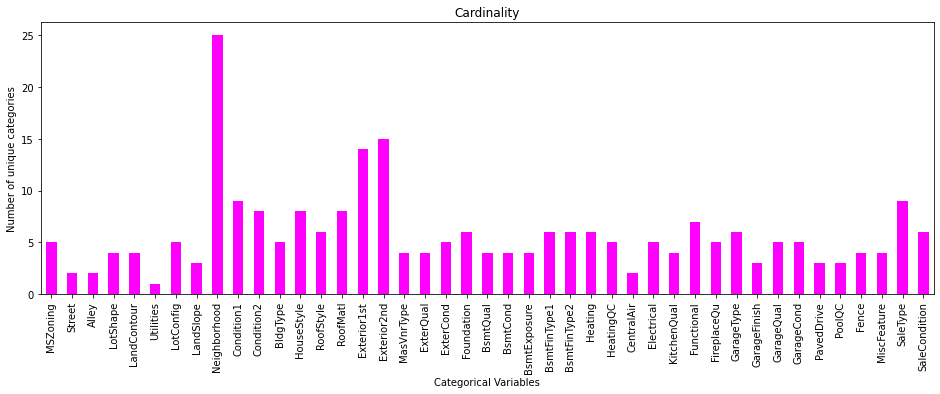

In [455]:
df[categorical_features].nunique().plot.bar(figsize=(16,5),color='magenta')
plt.ylabel('Number of unique categories')
plt.xlabel('Categorical Variables')
plt.title('Cardinality')

Observation :
Neighborhood, Exterior1st, Exterior2nd, SaleType column have max high cardinality othe have less 

Text(0.5, 1.0, 'Cardinality')

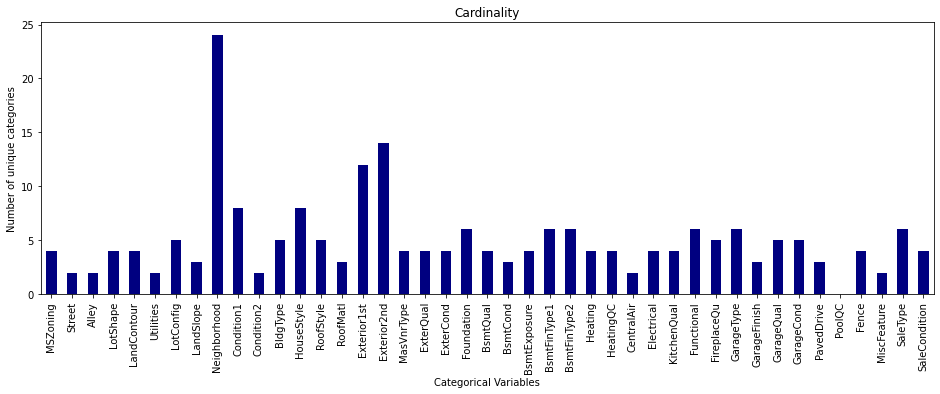

In [456]:
dftest[categorical_features].nunique().plot.bar(figsize=(16,5),color='navy')
plt.ylabel('Number of unique categories')
plt.xlabel('Categorical Variables')
plt.title('Cardinality')

###### check for outliers

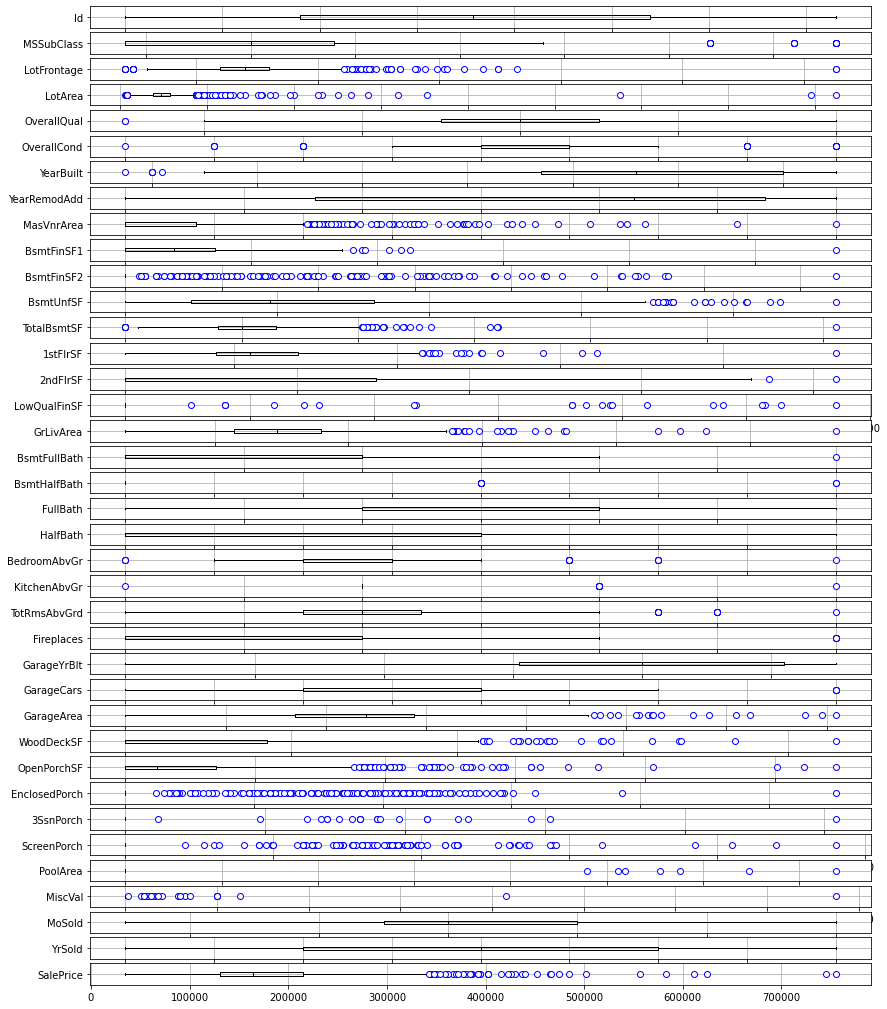

In [457]:
fig, pltcan=plt.subplots(nrows =len(numerical_features),ncols =1, figsize=(14,18))
red_color=dict(markerfacecolor='white',markeredgecolor='blue',marker='o')
for predcol , i in zip(numerical_features, range(len(numerical_features))):
    df.boxplot(column=predcol, vert=False, ax=pltcan[i], figsize=(15,16),color='black',flierprops=red_color)

Observation :
All columns have outliers except Id, YearRemodAdd, FullBath, HalfBath, GarageYrBlt, MoSold, YrSold columns

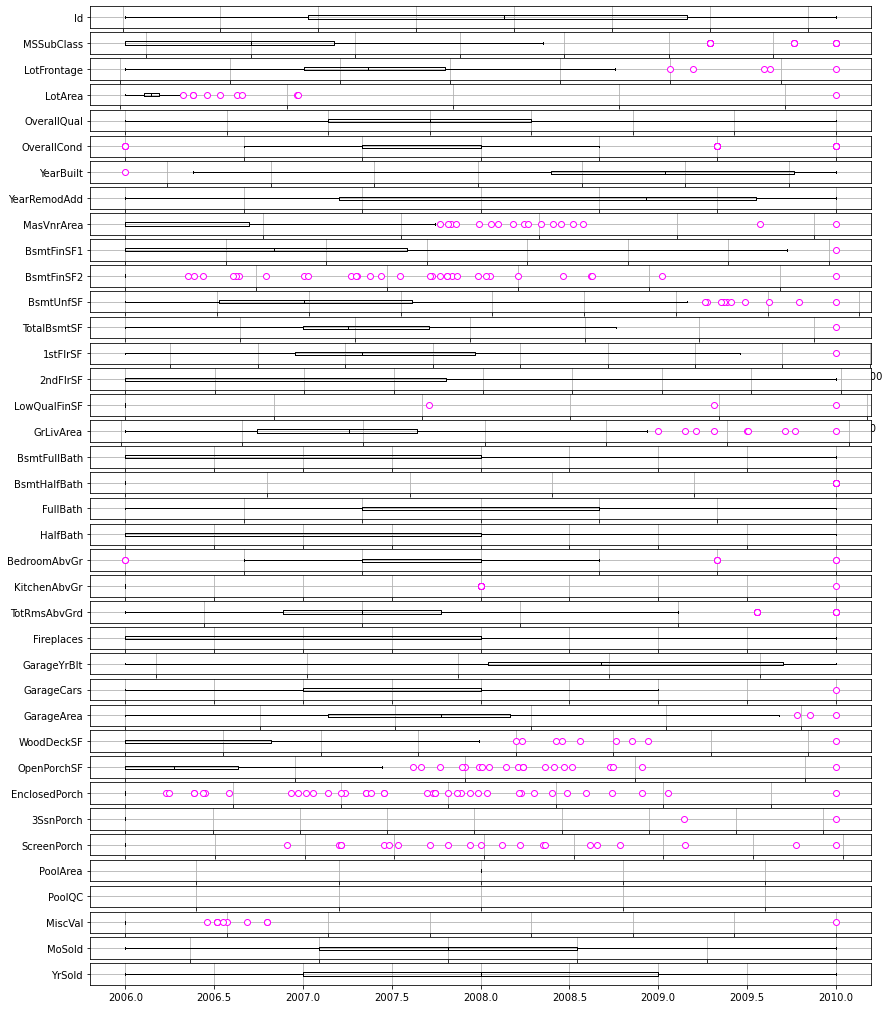

In [458]:
fig, pltcan=plt.subplots(nrows =len(numerical_features1),ncols =1, figsize=(14,18))
red_color=dict(markerfacecolor='white',markeredgecolor='magenta',marker='o')
for predcol , i in zip(numerical_features1, range(len(numerical_features1))):
    dftest.boxplot(column=predcol, vert=False, ax=pltcan[i], figsize=(15,16),color='black',flierprops=red_color)

Observation : All columns have outliers except Id, OverallQual,YearRemodAdd,2ndFirSF, BsmtfullBath, FullBath, HalfBath, FirePlaces, GarageYrBlt, PoolQC,PoolArea, MoSold, YrSold columns

###### check for skewness

Id                0.026526
MSSubClass        1.422019
LotFrontage       2.450241
LotArea          10.659285
OverallQual       0.175082
OverallCond       0.580714
YearBuilt        -0.579204
YearRemodAdd     -0.495864
MasVnrArea        2.826173
BsmtFinSF1        1.871606
BsmtFinSF2        4.365829
BsmtUnfSF         0.909057
TotalBsmtSF       1.744591
1stFlrSF          1.513707
2ndFlrSF          0.823479
LowQualFinSF      8.666142
GrLivArea         1.449952
BsmtFullBath      0.627106
BsmtHalfBath      4.264403
FullBath          0.057809
HalfBath          0.656492
BedroomAbvGr      0.243855
KitchenAbvGr      4.365259
TotRmsAbvGrd      0.644657
Fireplaces        0.671966
GarageYrBlt      -0.644564
GarageCars       -0.358556
GarageArea        0.189665
WoodDeckSF        1.504929
OpenPorchSF       2.410840
EnclosedPorch     3.043610
3SsnPorch         9.770611
ScreenPorch       4.105741
PoolArea         13.243711
MiscVal          23.065943
MoSold            0.220979
YrSold            0.115765
S

<AxesSubplot:>

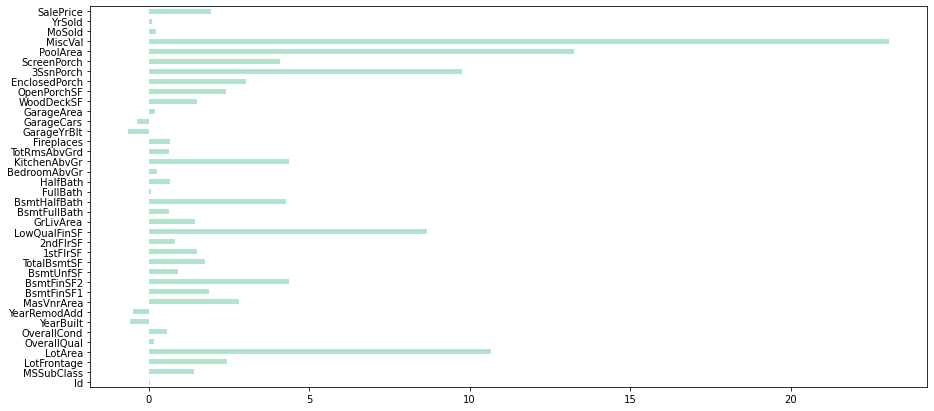

In [459]:
print(df.skew())
df.skew().plot(kind='barh',colormap='Pastel2',figsize=(15,7))

Observation :<br>
All Numerical Variables have skewness except Id, OverallQual, YearRemodAdd, FullBath, BedroomAbvGr, GarageCars, 
GarageArea, MoSold, YrSold columns

Id               -0.108806
MSSubClass        1.358597
LotFrontage       0.429744
LotArea          12.781805
OverallQual       0.397312
OverallCond       1.209714
YearBuilt        -0.755233
YearRemodAdd     -0.535600
MasVnrArea        1.973451
BsmtFinSF1        0.739790
BsmtFinSF2        3.698543
BsmtUnfSF         0.960708
TotalBsmtSF       0.519257
1stFlrSF          0.692047
2ndFlrSF          0.765511
LowQualFinSF     10.929928
GrLivArea         1.010586
BsmtFullBath      0.463685
BsmtHalfBath      3.544994
FullBath         -0.049800
HalfBath          0.758892
BedroomAbvGr      0.075315
KitchenAbvGr      4.849432
TotRmsAbvGrd      0.805535
Fireplaces        0.540164
GarageYrBlt      -0.663073
GarageCars       -0.280324
GarageArea        0.133547
WoodDeckSF        1.708221
OpenPorchSF       2.185030
EnclosedPorch     3.177046
3SsnPorch        12.277476
ScreenPorch       4.182351
PoolArea          0.000000
PoolQC                 NaN
MiscVal          13.264758
MoSold            0.186504
Y

<AxesSubplot:>

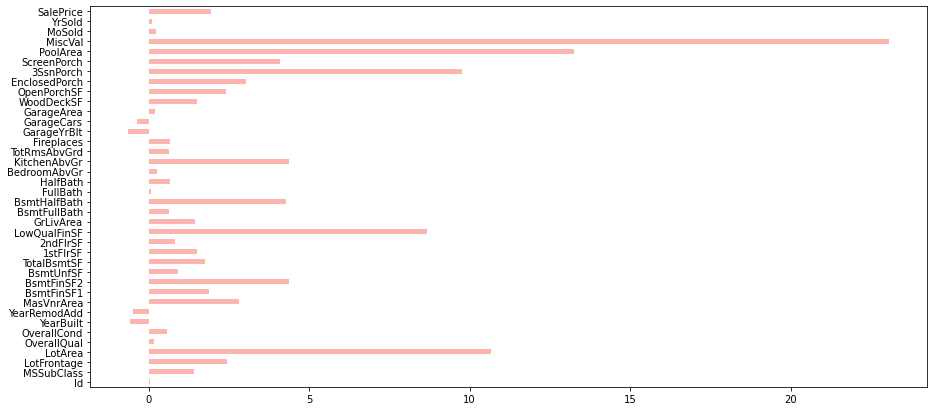

In [460]:
print(dftest.skew())
df.skew().plot(kind='barh',colormap='Pastel1',figsize=(15,7))

###### Identify Target and Feature Variable

Prediction-predicte about  price of houses

Targe Variable(Depaendent Features)- SalePrice<br>
Predictors(Independent Features)- All variables

###### Univariate Analysis

In [322]:
#Descrete variable

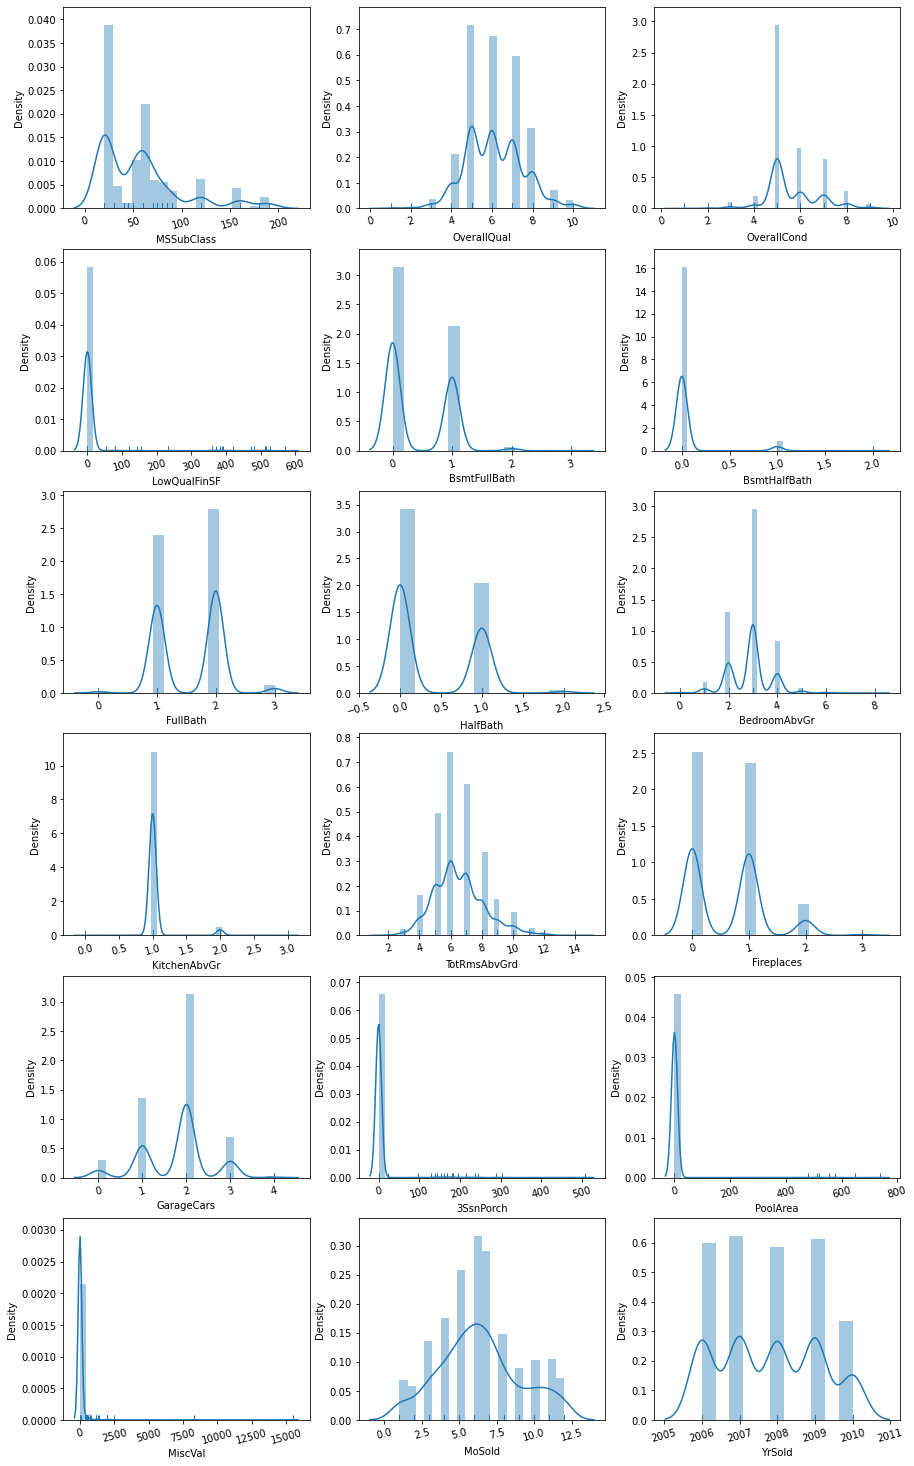

In [323]:
plt.figure(figsize=(15,26))
for i in enumerate(descrete_feature):
    plt.subplot(6,3,i[0]+1)
    sns.distplot(df[i[1]],rug=True)
    plt.xticks(rotation=15)

In [324]:
#continuous variable

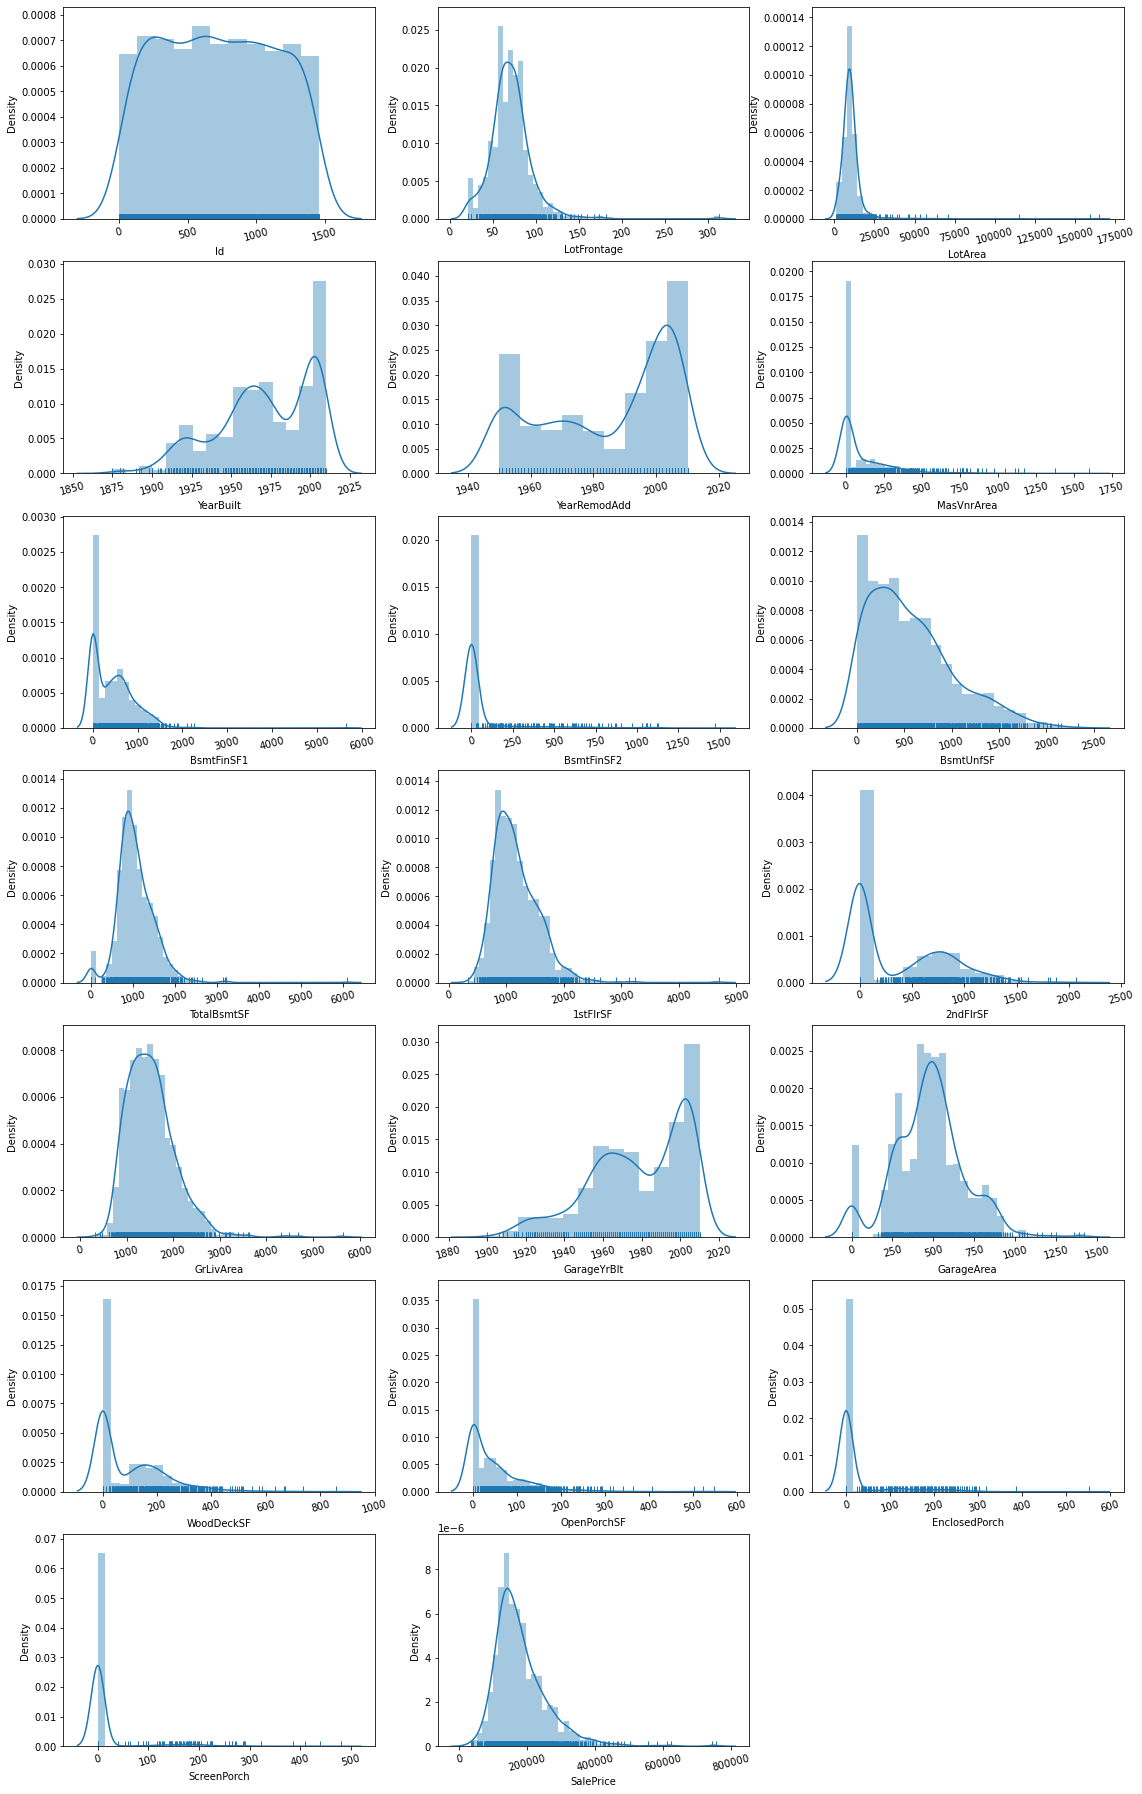

In [325]:
plt.figure(figsize=(19,32))
for i in enumerate(continuous_feature):
    plt.subplot(7,3,i[0]+1)
    sns.distplot(df[i[1]],rug=True)
    plt.xticks(rotation=15)

In [326]:
#binary variable

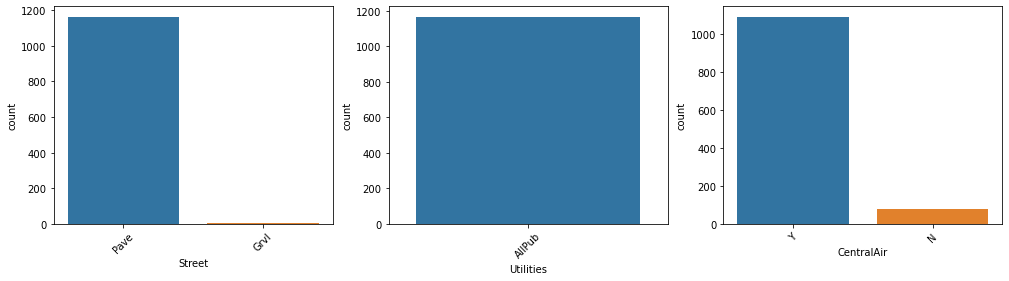

In [180]:
plt.figure(figsize=(23,4))
for i in enumerate(binary_feature):
    plt.subplot(1,4,i[0]+1)
    sns.countplot(i[1],data=df)
    plt.xticks(rotation=45)

In [181]:
##nominal variable

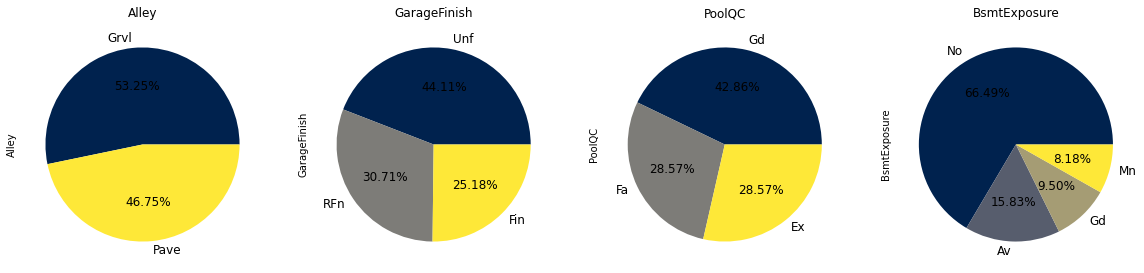

In [182]:
f1=['Alley','GarageFinish','PoolQC','BsmtExposure']
for i in enumerate(f1):
    plt.subplot(1,4,i[0]+1)
    #sns.countplot(i[1],data=df)
    df[i[1]].value_counts().plot(kind = "pie",autopct='%1.2f%%',fontsize=12,figsize=(20,35),colormap='cividis',title=i[1])
    plt.xticks(rotation=35)

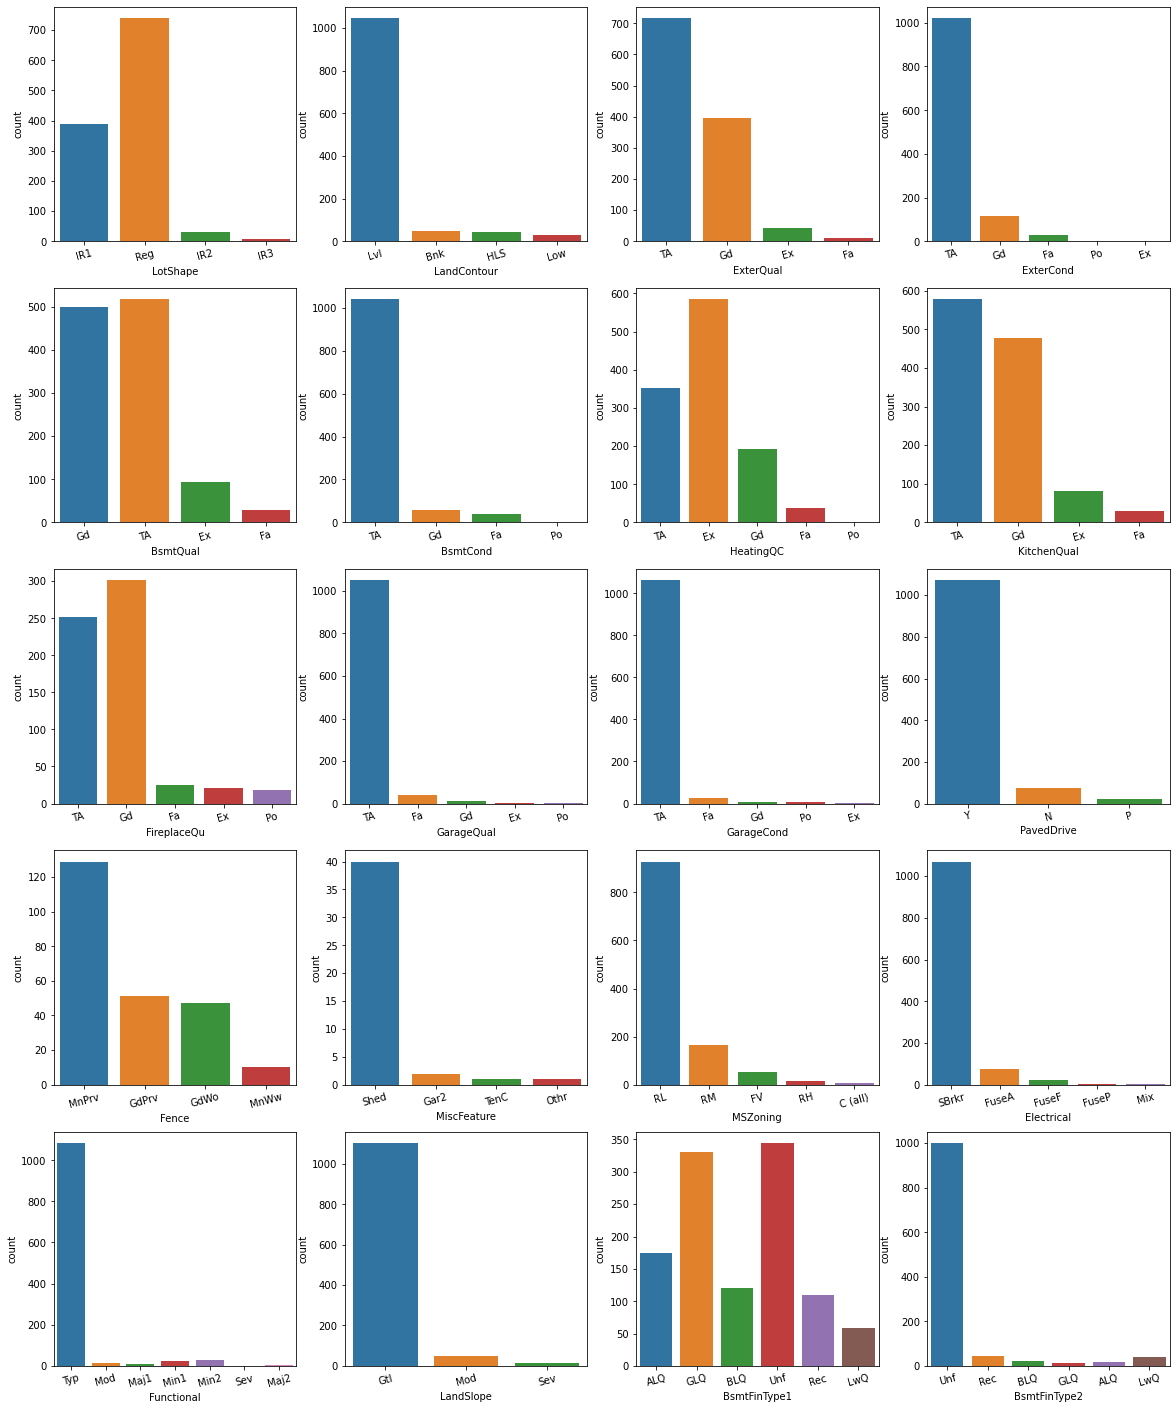

In [183]:
f2=['LotShape','LandContour','ExterQual','ExterCond','BsmtQual','BsmtCond','HeatingQC','KitchenQual','FireplaceQu',
    'GarageQual','GarageCond','PavedDrive','Fence','MiscFeature','MSZoning','Electrical','Functional','LandSlope',
    'BsmtFinType1','BsmtFinType2']
plt.figure(figsize=(20,25))
for i in enumerate(f2):
    plt.subplot(5,4,i[0]+1)
    sns.countplot(i[1],data=df)
    plt.xticks(rotation=15)

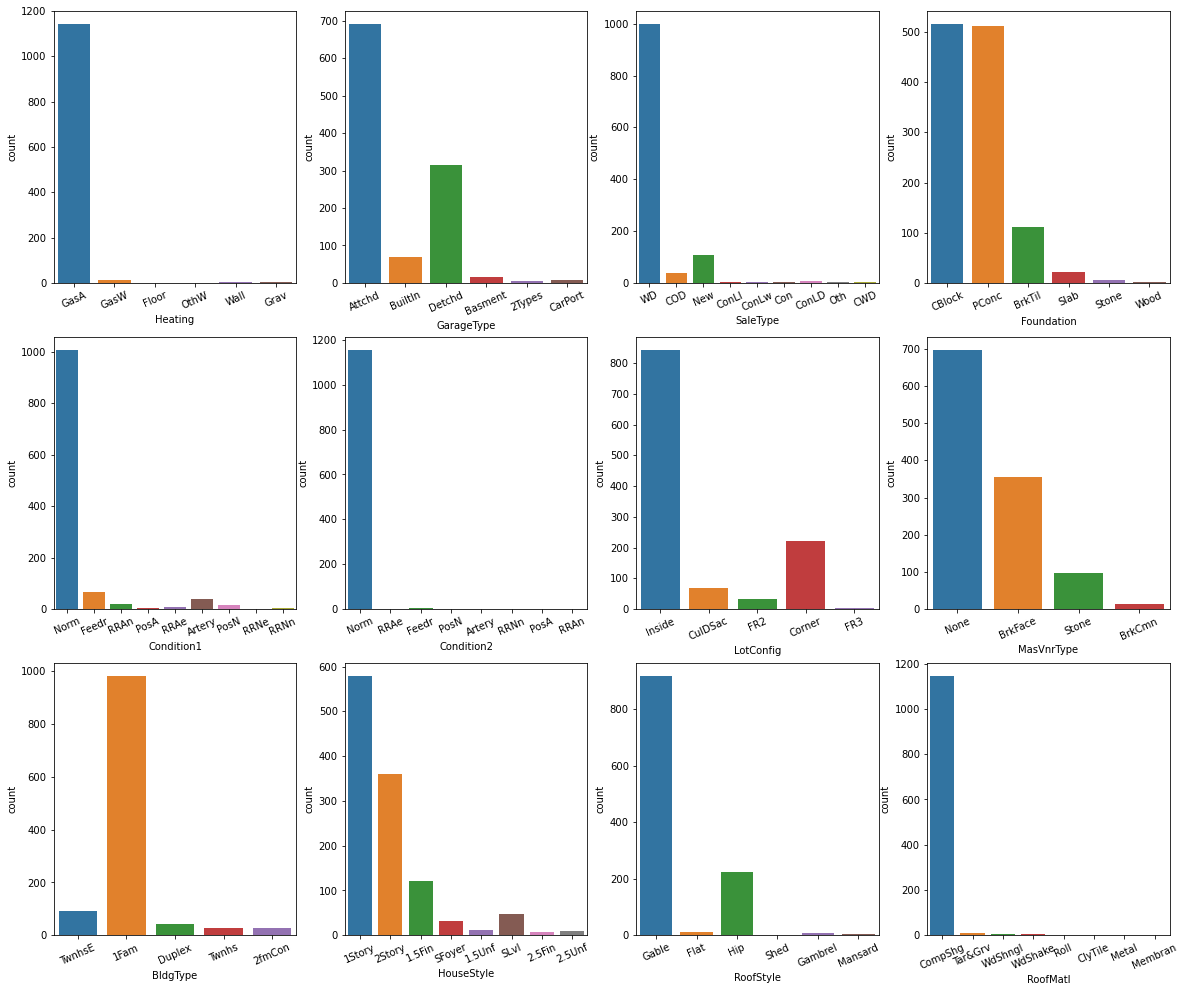

In [184]:
f3=['Heating','GarageType','SaleType','Foundation','Condition1','Condition2','LotConfig','MasVnrType','BldgType',
    'HouseStyle','RoofStyle','RoofMatl']
plt.figure(figsize=(20,17))
for i in enumerate(f3):
    plt.subplot(3,4,i[0]+1)
    sns.countplot(i[1],data=df)
    plt.xticks(rotation=24)

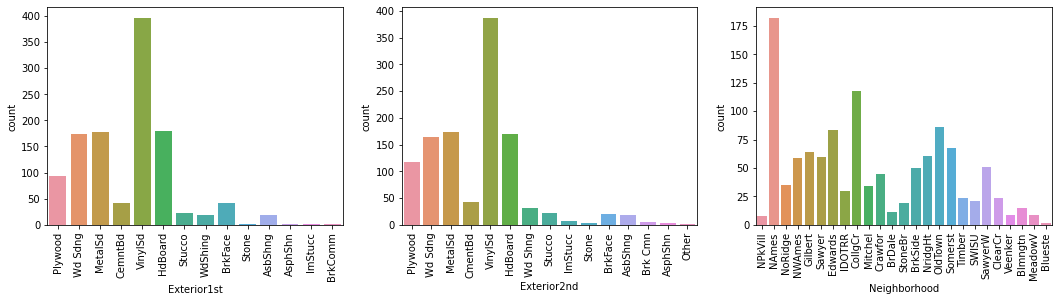

In [185]:
f4=['Exterior1st','Exterior2nd','Neighborhood']
plt.figure(figsize=(18,4))
for i in enumerate(f4):
    plt.subplot(1,3,i[0]+1)
    sns.countplot(i[1],data=df)
    plt.xticks(rotation=90)

###### Bivariate Analysis

###### SalePrice vs Numerical

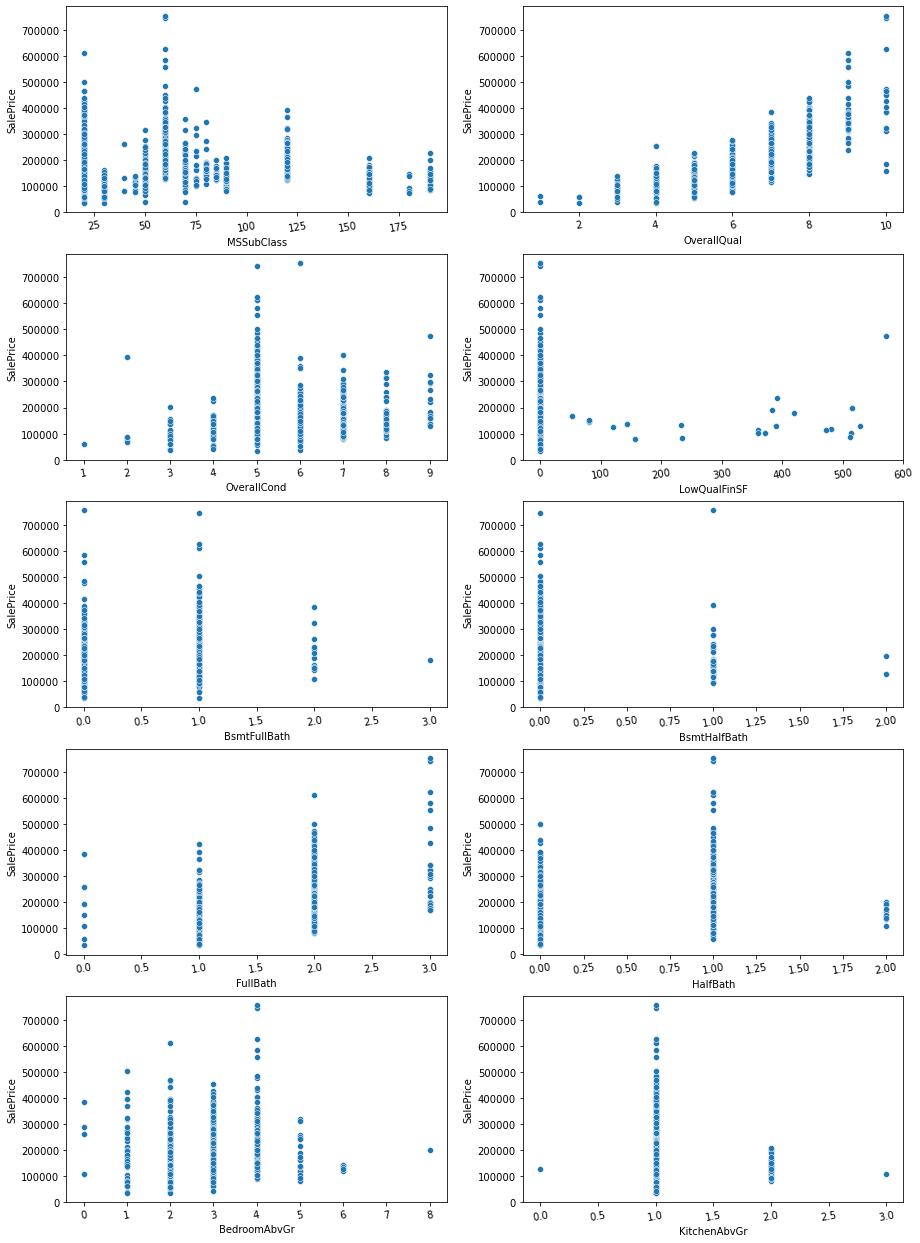

In [186]:
d1=['MSSubClass','OverallQual','OverallCond','LowQualFinSF','BsmtFullBath','BsmtHalfBath','FullBath',
    'HalfBath','BedroomAbvGr','KitchenAbvGr']
plt.figure(figsize=(15,22))
for i in enumerate(d1):
    plt.subplot(5,2,i[0]+1)
    sns.scatterplot(x=i[1],y='SalePrice',data=df)
    plt.xticks(rotation=10)

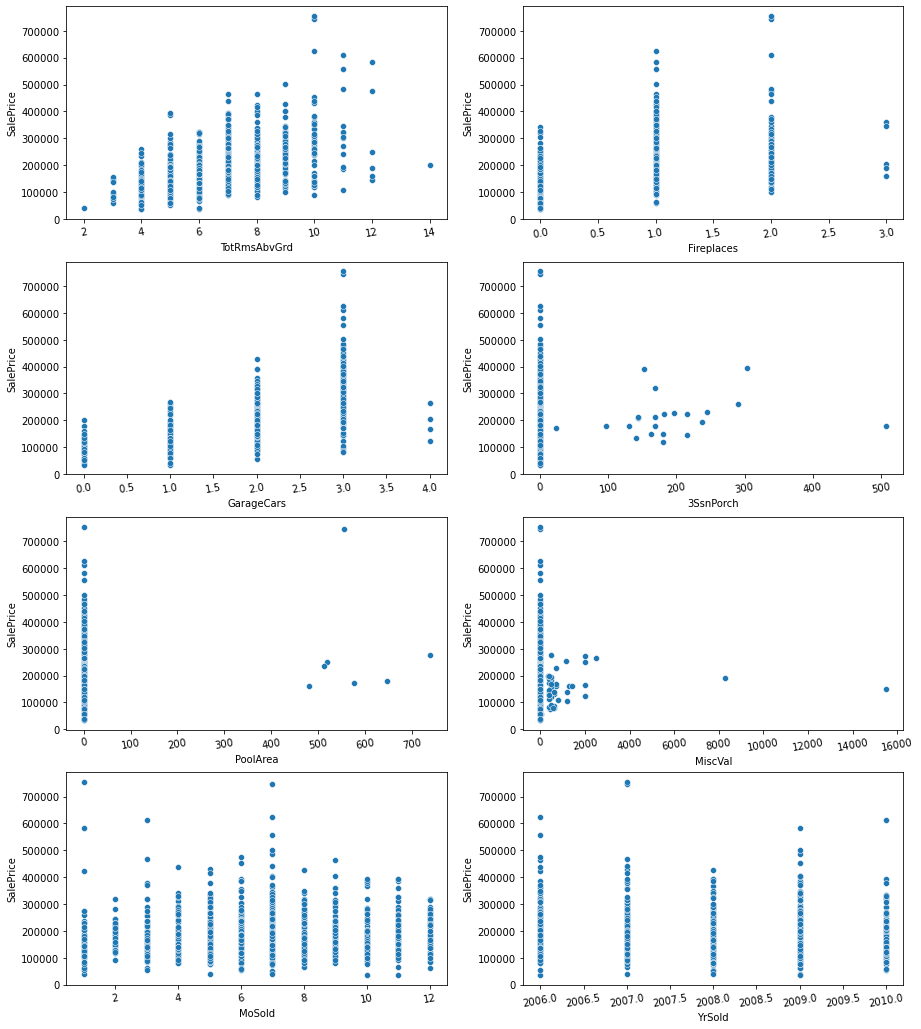

In [187]:
d2=['TotRmsAbvGrd','Fireplaces','GarageCars','3SsnPorch','PoolArea','MiscVal','MoSold','YrSold']
plt.figure(figsize=(15,18))
for i in enumerate(d2):
    plt.subplot(4,2,i[0]+1)
    sns.scatterplot(x=i[1],y='SalePrice',data=df)
    plt.xticks(rotation=10)

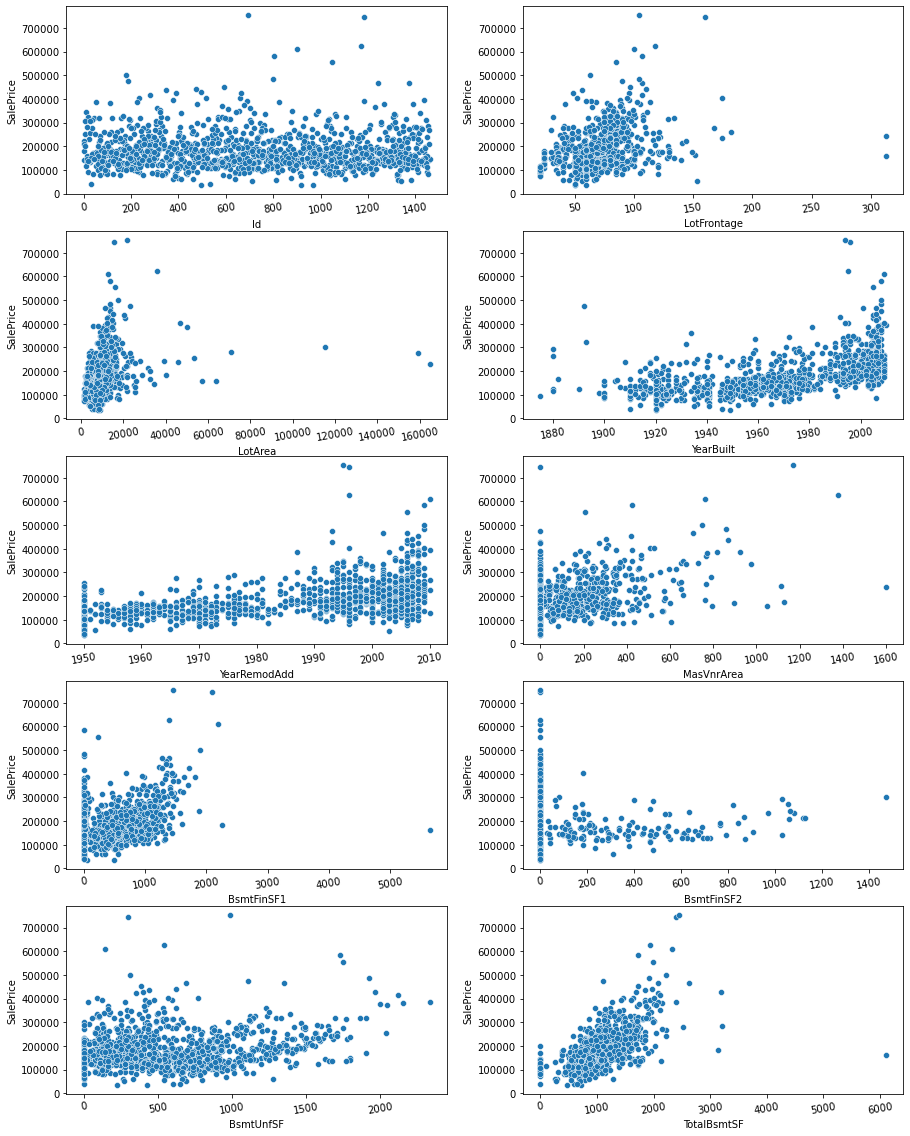

In [188]:
d3=['Id','LotFrontage','LotArea','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF']
plt.figure(figsize=(15,20))
for i in enumerate(d3):
    plt.subplot(5,2,i[0]+1)
    sns.scatterplot(x=i[1],y='SalePrice',data=df)
    plt.xticks(rotation=10)

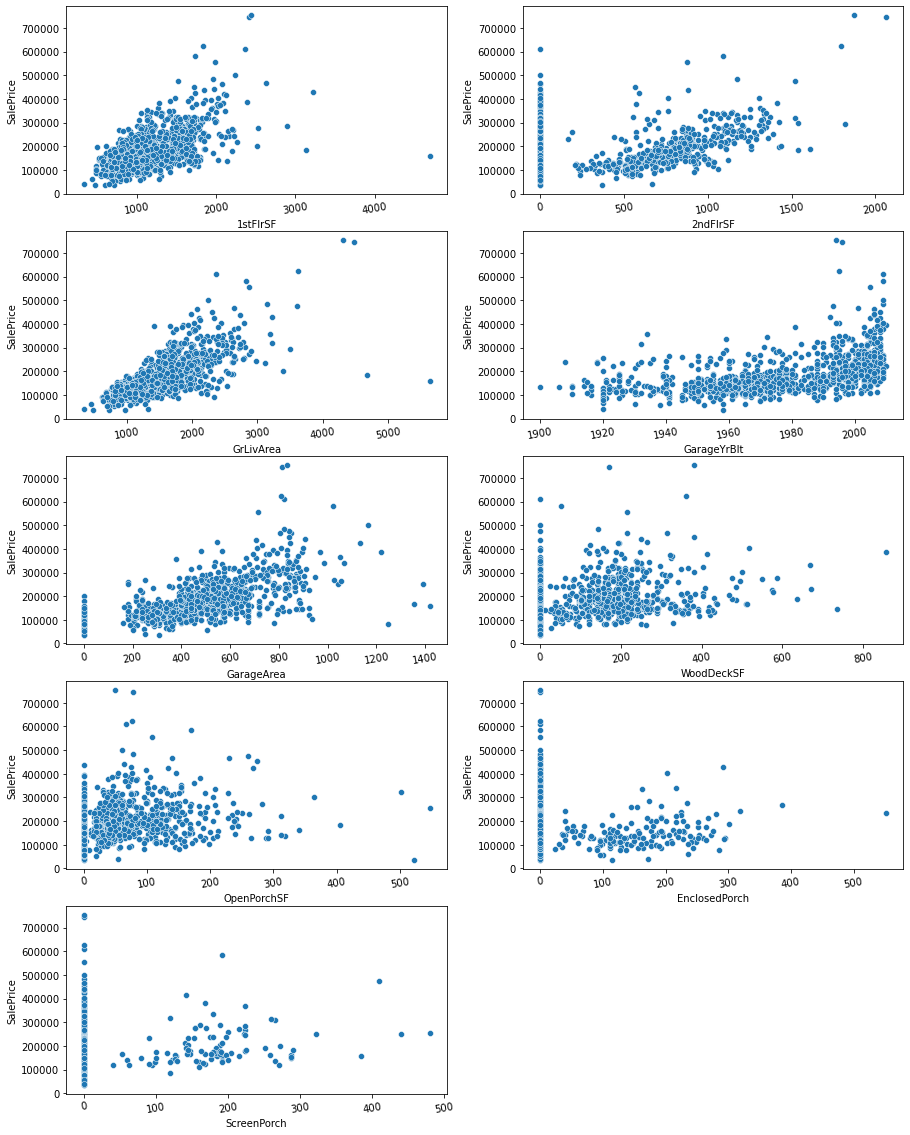

In [189]:
d4=['1stFlrSF','2ndFlrSF','GrLivArea','GarageYrBlt','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','ScreenPorch']
plt.figure(figsize=(15,20))
for i in enumerate(d4):
    plt.subplot(5,2,i[0]+1)
    sns.scatterplot(x=i[1],y='SalePrice',data=df)
    plt.xticks(rotation=10)

###### SalePrice vs Categorical

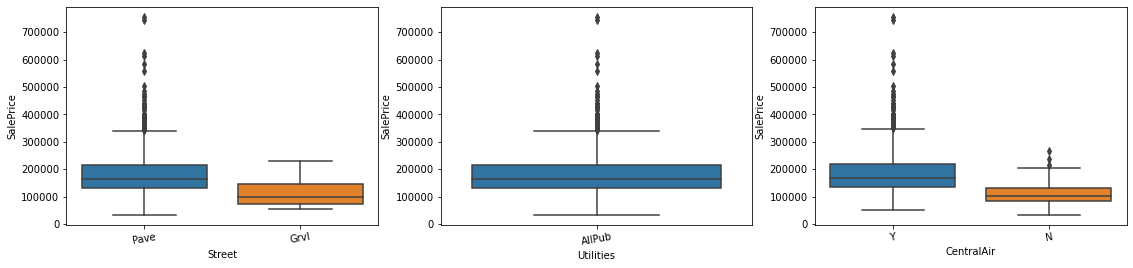

In [190]:
plt.figure(figsize=(19,4))
for i in enumerate(binary_feature):
    plt.subplot(1,3,i[0]+1)
    sns.boxplot(x=i[1],y='SalePrice',data=df)
    plt.xticks(rotation=10)

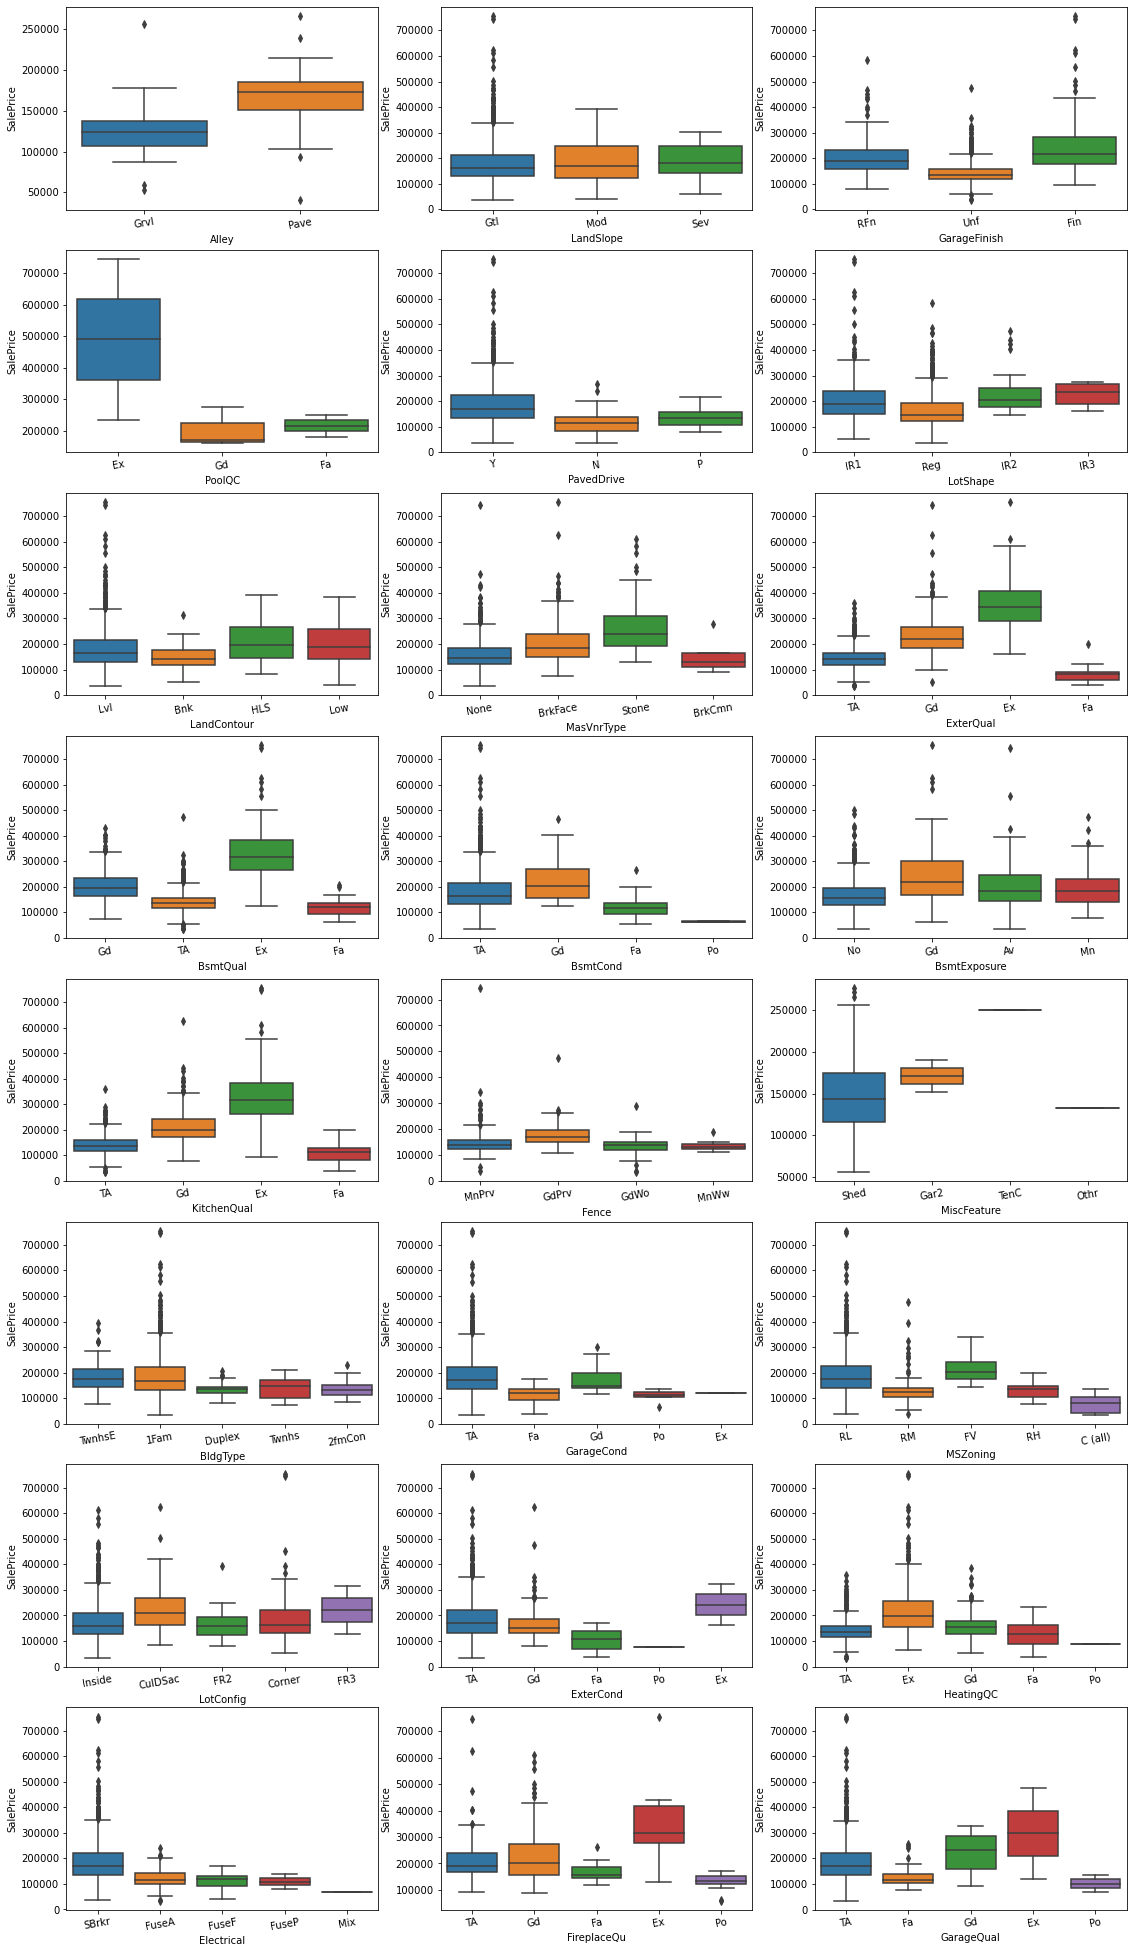

In [191]:
d5=['Alley','LandSlope','GarageFinish','PoolQC','PavedDrive','LotShape','LandContour','MasVnrType','ExterQual',
    'BsmtQual','BsmtCond','BsmtExposure','KitchenQual','Fence','MiscFeature','BldgType','GarageCond','MSZoning',
    'LotConfig','ExterCond','HeatingQC','Electrical','FireplaceQu','GarageQual']
plt.figure(figsize=(19,35))
for i in enumerate(d5):
    plt.subplot(8,3,i[0]+1)
    sns.boxplot(x=i[1],y='SalePrice',data=df)
    plt.xticks(rotation=10)

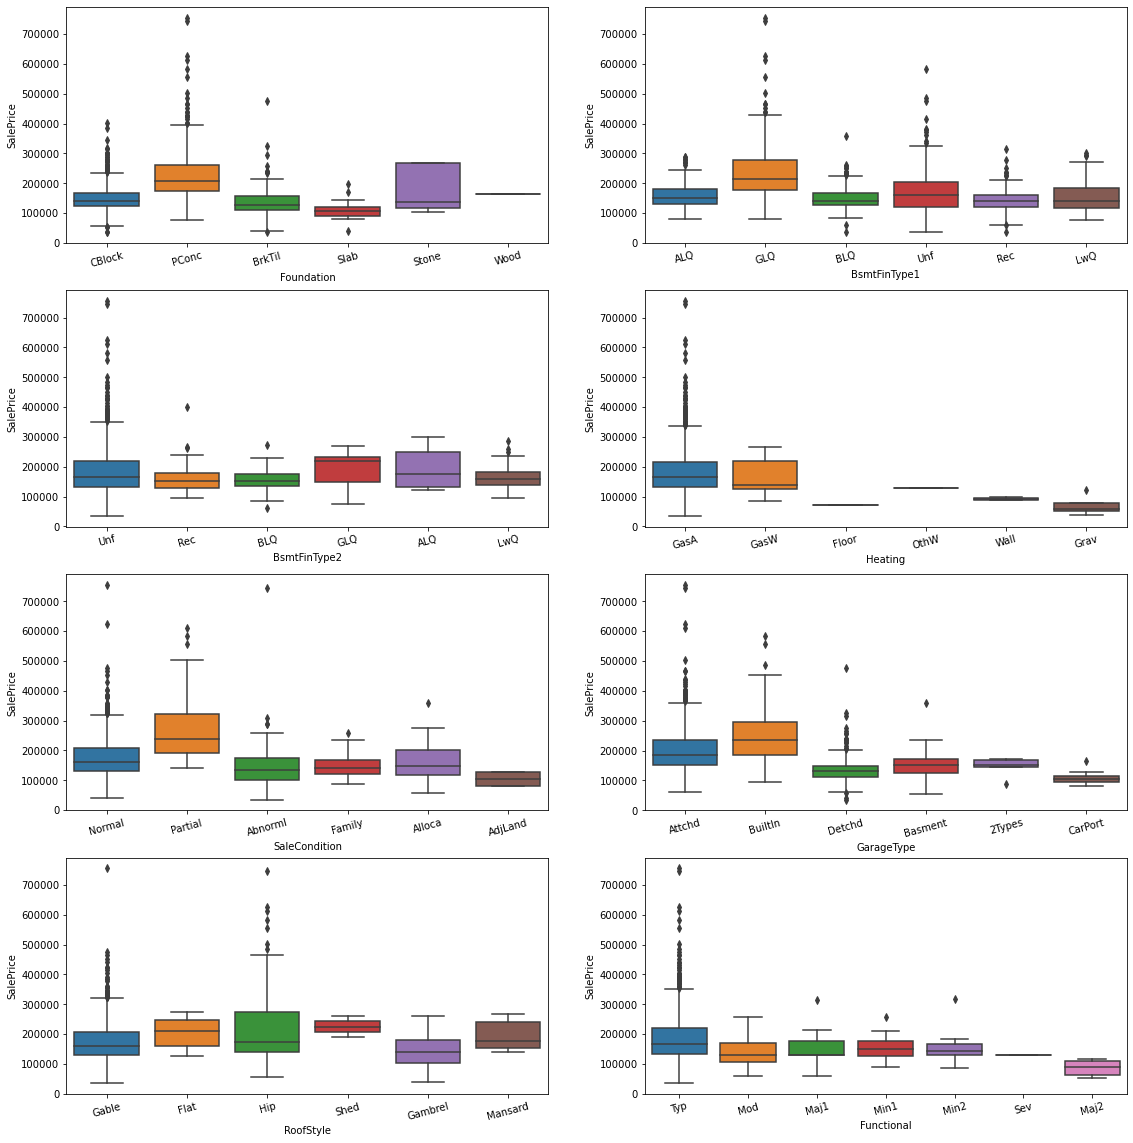

In [192]:
d6=['Foundation','BsmtFinType1','BsmtFinType2','Heating','SaleCondition','GarageType','RoofStyle','Functional']
plt.figure(figsize=(19,20))
for i in enumerate(d6):
    plt.subplot(4,2,i[0]+1)
    sns.boxplot(x=i[1],y='SalePrice',data=df)
    plt.xticks(rotation=15)

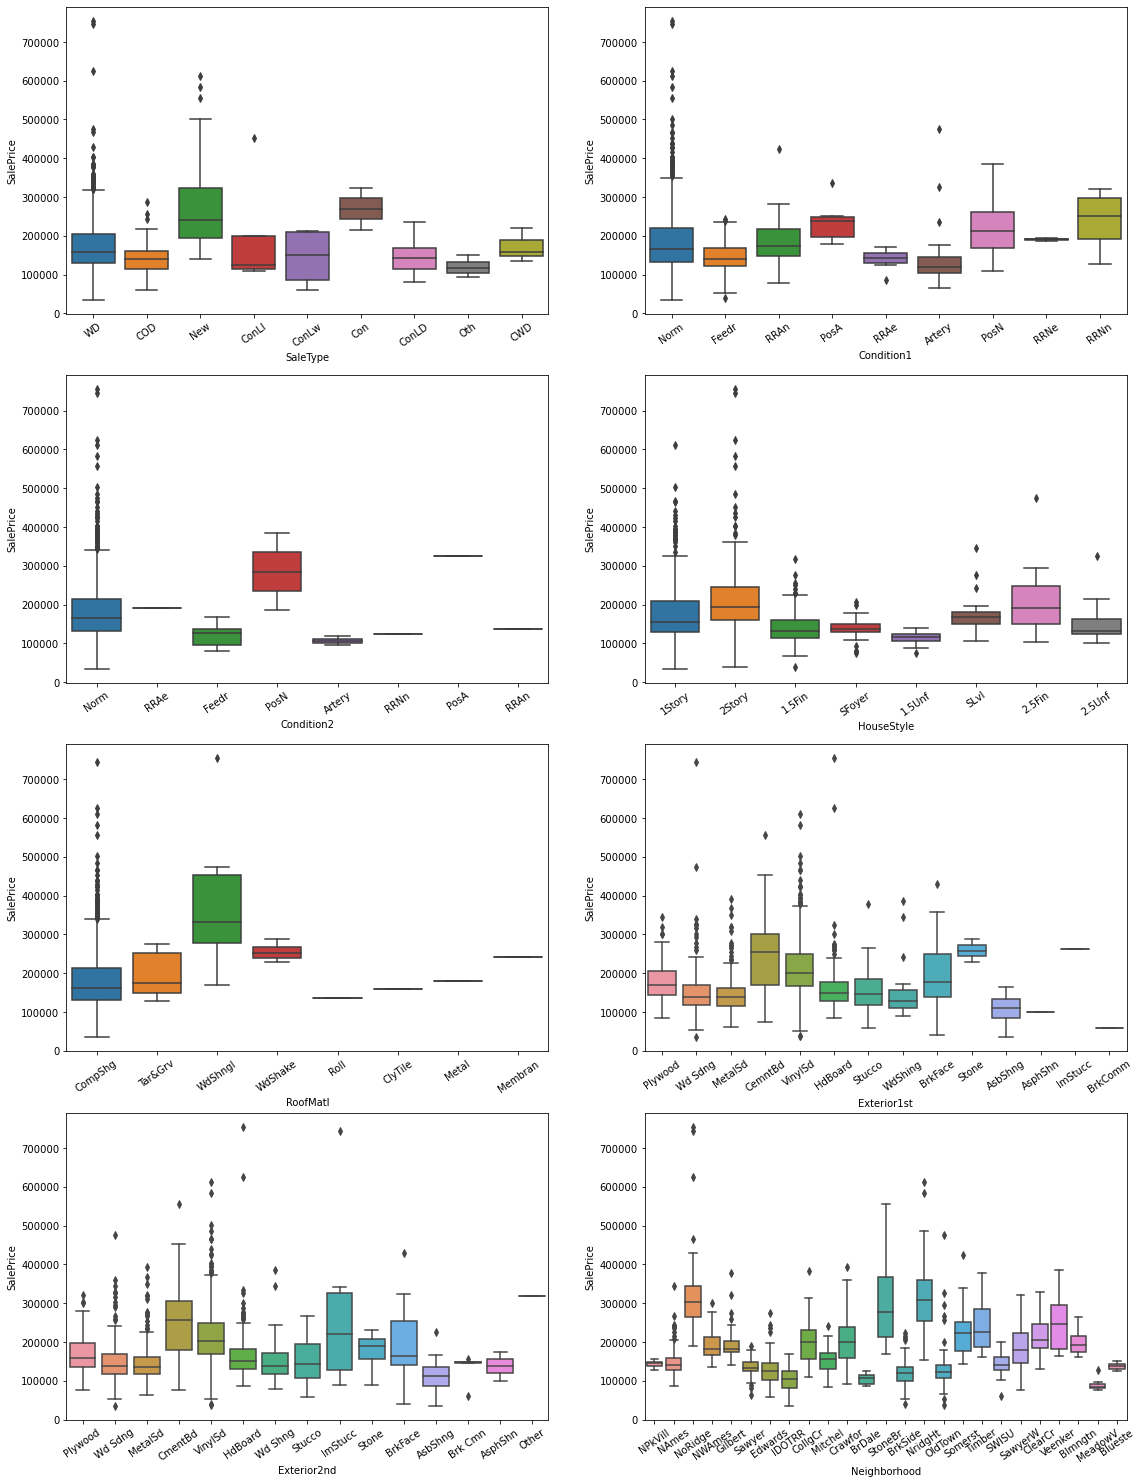

In [193]:
d7=['SaleType','Condition1','Condition2','HouseStyle','RoofMatl','Exterior1st','Exterior2nd','Neighborhood']
plt.figure(figsize=(19,26))
for i in enumerate(d7):
    plt.subplot(4,2,i[0]+1)
    sns.boxplot(x=i[1],y='SalePrice',data=df)
    plt.xticks(rotation=35)

###### Handling Outliers

In [461]:
fout=['MSSubClass','LotFrontage','LotArea','OverallQual','OverallCond','YearBuilt','MasVnrArea','BsmtFinSF1',
'BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','BsmtFullBath',
'BedroomAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','SalePrice','ScreenPorch',
'EnclosedPorch']
for f in fout:
    q1 = df[f].quantile(0.25)
    q3 = df[f].quantile(0.75)
    IQR = q3-q1
    lolimit = q1 - (IQR*1.5)
    uplimit = q3 + (IQR*1.5)
    df.loc[df[f]<lolimit,f] = lolimit
    df.loc[df[f]>uplimit,f] = uplimit

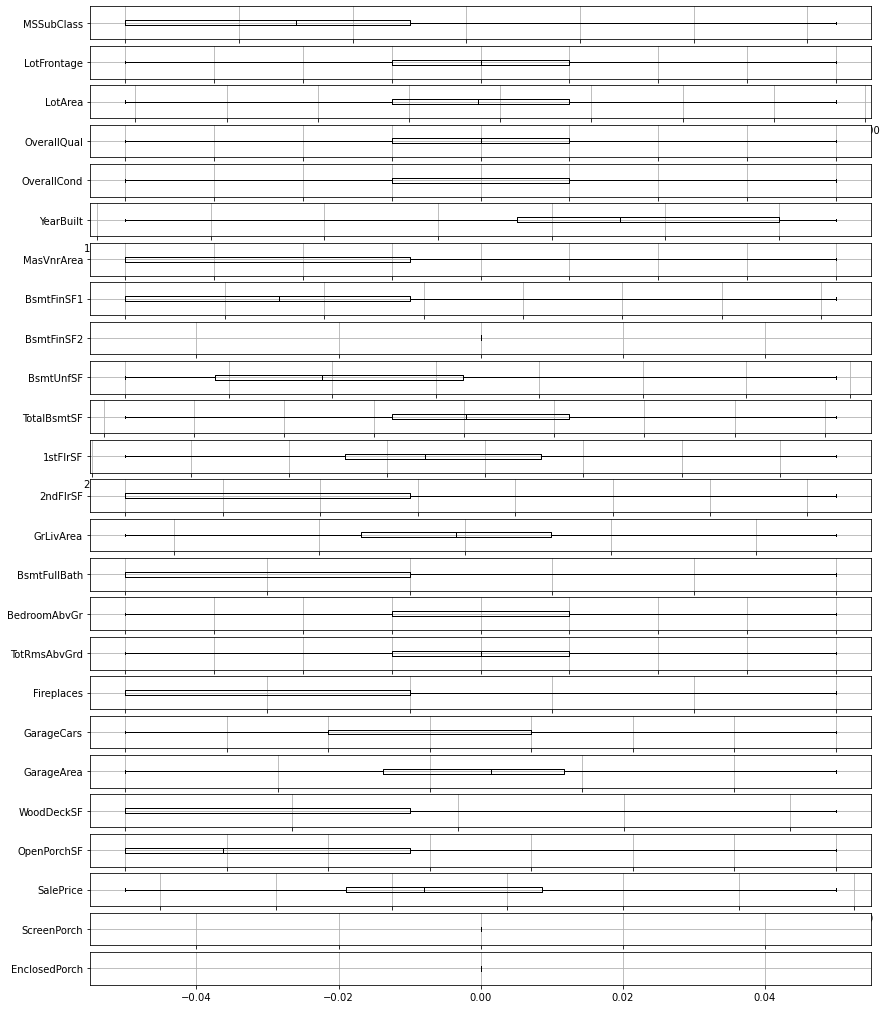

In [462]:
fig, pltcan=plt.subplots(nrows =len(fout),ncols =1, figsize=(14,18))
red_color=dict(markerfacecolor='white',markeredgecolor='indigo',marker='o')
for predcol , i in zip(fout, range(len(fout))):
    df.boxplot(column=predcol, vert=False, ax=pltcan[i], figsize=(15,16),color='black',flierprops=red_color)

In [463]:
fout1=['MSSubClass','LotFrontage','LotArea','OverallCond','YearBuilt','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF',
 'TotalBsmtSF','1stFlrSF','LowQualFinSF','GrLivArea','BsmtHalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd',
 'Fireplaces','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','MiscVal']

for f in fout1:
    q1 = dftest[f].quantile(0.25)
    q3 = dftest[f].quantile(0.75)
    IQR = q3-q1
    lolimit = q1 - (IQR*1.5)
    uplimit = q3 + (IQR*1.5)
    dftest.loc[dftest[f]<lolimit,f] = lolimit
    dftest.loc[dftest[f]>uplimit,f] = uplimit

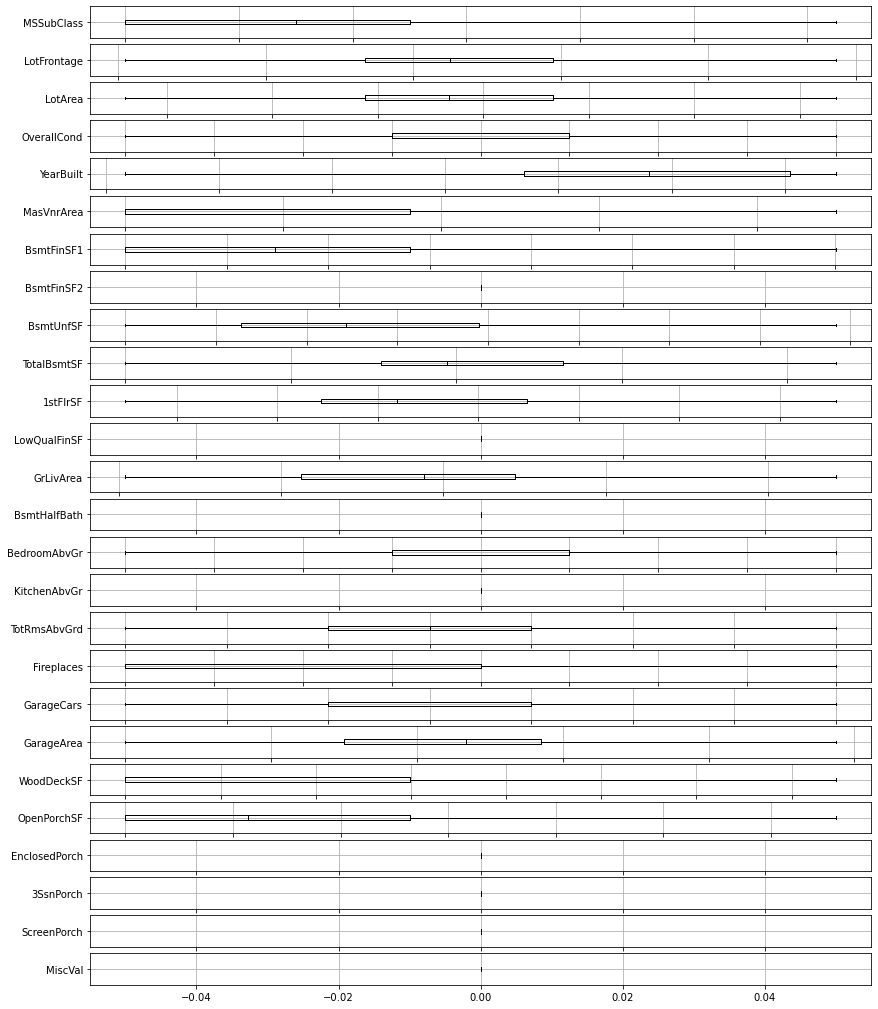

In [464]:
fig, pltcan=plt.subplots(nrows =len(fout1),ncols =1, figsize=(14,18))
red_color=dict(markerfacecolor='white',markeredgecolor='indigo',marker='o')
for predcol , i in zip(fout1, range(len(fout1))):
    dftest.boxplot(column=predcol, vert=False, ax=pltcan[i], figsize=(15,16),color='black',flierprops=red_color)

Observation: Outliers Removed

###### Handling MIssing Values / Encoding Variables

In [465]:
df['MasVnrArea']=df['MasVnrArea'].replace(np.nan,0)
df['LotFrontage'] = df['LotFrontage'].replace(np.nan,70)
df['GarageYrBlt'] = df['GarageYrBlt'].replace(np.nan,1980)

In [466]:
df['GarageType'] = df['GarageType'].replace(np.nan,0)
df['GarageType'] = df['GarageType'].replace('Attchd',1)
df['GarageType'] = df['GarageType'].replace('BuiltIn',2)
df['GarageType'] = df['GarageType'].replace('Detchd',3)
df['GarageType'] = df['GarageType'].replace('Basment',4)
df['GarageType'] = df['GarageType'].replace('2Types',5)
df['GarageType'] = df['GarageType'].replace('CarPort',6)
df['GarageFinish'] = df['GarageFinish'].replace(np.nan,0)
df['GarageFinish'] = df['GarageFinish'].replace('RFn',1)
df['GarageFinish'] = df['GarageFinish'].replace('Unf',2)
df['GarageFinish'] = df['GarageFinish'].replace('Fin',3)
df['GarageQual'] = df['GarageQual'].replace(np.nan,0)
df['GarageQual'] = df['GarageQual'].replace('TA',1)
df['GarageQual'] = df['GarageQual'].replace('Fa',2)
df['GarageQual'] = df['GarageQual'].replace('Gd',3)
df['GarageQual'] = df['GarageQual'].replace('Ex',4)
df['GarageQual'] = df['GarageQual'].replace('Po',5)
df['GarageCond'] = df['GarageCond'].replace(np.nan,0)
df['GarageCond'] = df['GarageCond'].replace('TA',1)
df['GarageCond'] = df['GarageCond'].replace('Fa',2)
df['GarageCond'] = df['GarageCond'].replace('Gd',3)
df['GarageCond'] = df['GarageCond'].replace('Ex',4)
df['GarageCond'] = df['GarageCond'].replace('Po',5)
df['BsmtFinType2'] = df['BsmtFinType2'].replace(np.nan,0)
df['BsmtFinType2'] = df['BsmtFinType2'].replace('Unf',1)
df['BsmtFinType2'] = df['BsmtFinType2'].replace('Rec',2)
df['BsmtFinType2'] = df['BsmtFinType2'].replace('BLQ',3)
df['BsmtFinType2'] = df['BsmtFinType2'].replace('GLQ',4)
df['BsmtFinType2'] = df['BsmtFinType2'].replace('ALQ',5)
df['BsmtFinType2'] = df['BsmtFinType2'].replace('LwQ',6)
df['BsmtExposure'] = df['BsmtExposure'].replace(np.nan,0)
df['BsmtExposure'] = df['BsmtExposure'].replace('No',1)
df['BsmtExposure'] = df['BsmtExposure'].replace('Gd',2)
df['BsmtExposure'] = df['BsmtExposure'].replace('Av',3)
df['BsmtExposure'] = df['BsmtExposure'].replace('Mn',4)
df['BsmtExposure'] = df['BsmtExposure'].replace('Mn',5)
df['BsmtQual'] = df['BsmtQual'].replace(np.nan,0)
df['BsmtQual'] = df['BsmtQual'].replace('Gd',1)
df['BsmtQual'] = df['BsmtQual'].replace('TA',2)
df['BsmtQual'] = df['BsmtQual'].replace('Ex',3)
df['BsmtQual'] = df['BsmtQual'].replace('Fa',4)
df['BsmtCond'] = df['BsmtCond'].replace(np.nan,0)
df['BsmtCond'] = df['BsmtCond'].replace('Gd',1)
df['BsmtCond'] = df['BsmtCond'].replace('TA',2)
df['BsmtCond'] = df['BsmtCond'].replace('Po',3)
df['BsmtCond'] = df['BsmtCond'].replace('Fa',4)
df['BsmtFinType1'] = df['BsmtFinType1'].replace(np.nan,0)
df['BsmtFinType1'] = df['BsmtFinType1'].replace('ALQ',1)
df['BsmtFinType1'] = df['BsmtFinType1'].replace('GLQ',2)
df['BsmtFinType1'] = df['BsmtFinType1'].replace('BLQ',3)
df['BsmtFinType1'] = df['BsmtFinType1'].replace('Unf',4)
df['BsmtFinType1'] = df['BsmtFinType1'].replace('Rec',5)
df['BsmtFinType1'] = df['BsmtFinType1'].replace('LwQ',6)
df['MasVnrType'] = df['MasVnrType'].replace(np.nan,0)
df['MasVnrType'] = df['MasVnrType'].replace('None',1)
df['MasVnrType'] = df['MasVnrType'].replace('BrkFace',2)
df['MasVnrType'] = df['MasVnrType'].replace('Stone',3)
df['MasVnrType'] = df['MasVnrType'].replace('BrkCmn',4)

In [467]:
df['Alley'] = df['Alley'].replace(np.nan,0)
df['Alley'] = df['Alley'].replace('Grvl',1)
df['Alley'] = df['Alley'].replace('Pave',2)
df['MiscFeature'] = df['MiscFeature'].replace(np.nan,0)
df['MiscFeature'] = df['MiscFeature'].replace('Shed',1)
df['MiscFeature'] = df['MiscFeature'].replace('Gar2',2)
df['MiscFeature'] = df['MiscFeature'].replace('TenC',3)
df['MiscFeature'] = df['MiscFeature'].replace('Othr',4)
df['PoolQC'] = df['PoolQC'].replace(np.nan,0)
df['PoolQC'] = df['PoolQC'].replace('Ex',1)
df['PoolQC'] = df['PoolQC'].replace('Gd',2)
df['PoolQC'] = df['PoolQC'].replace('Fa',3)
df['Fence'] = df['Fence'].replace(np.nan,0)
df['Fence'] = df['Fence'].replace('MnPrv',1)
df['Fence'] = df['Fence'].replace('GdPrv',2)
df['Fence'] = df['Fence'].replace('GdWo',3)
df['Fence'] = df['Fence'].replace('MnWw',4)
df['FireplaceQu'] = df['FireplaceQu'].replace(np.nan,0)
df['FireplaceQu'] = df['FireplaceQu'].replace('TA',1)
df['FireplaceQu'] = df['FireplaceQu'].replace('Gd',2)
df['FireplaceQu'] = df['FireplaceQu'].replace('Fa',3)
df['FireplaceQu'] = df['FireplaceQu'].replace('Ex',4)
df['FireplaceQu'] = df['FireplaceQu'].replace('Po',5)

In [468]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['MSZoning']=le.fit_transform(df['MSZoning'])
df['LotShape']=le.fit_transform(df['LotShape'])
df['Street']=le.fit_transform(df['Street'])
df['LandContour']=le.fit_transform(df['LandContour'])
df['Utilities']=le.fit_transform(df['Utilities'])
df['LotConfig']=le.fit_transform(df['LotConfig'])
df['LandSlope']=le.fit_transform(df['LandSlope'])
df['Neighborhood']=le.fit_transform(df['Neighborhood'])
df['Condition1']=le.fit_transform(df['Condition1'])
df['Condition2']=le.fit_transform(df['Condition2'])
df['BldgType']=le.fit_transform(df['BldgType'])
df['HouseStyle']=le.fit_transform(df['HouseStyle'])
df['RoofStyle']=le.fit_transform(df['RoofStyle'])
df['RoofMatl']=le.fit_transform(df['RoofMatl'])
df['Exterior1st']=le.fit_transform(df['Exterior1st'])
df['Exterior2nd']=le.fit_transform(df['Exterior2nd'])
df['ExterQual']=le.fit_transform(df['ExterQual'])
df['ExterCond']=le.fit_transform(df['ExterCond'])
df['Foundation']=le.fit_transform(df['Foundation'])
df['Heating']=le.fit_transform(df['Heating'])
df['HeatingQC']=le.fit_transform(df['HeatingQC'])
df['CentralAir']=le.fit_transform(df['CentralAir'])
df['Electrical']=le.fit_transform(df['Electrical'])
df['KitchenQual']=le.fit_transform(df['KitchenQual'])
df['Functional']=le.fit_transform(df['Functional'])
df['PavedDrive']=le.fit_transform(df['PavedDrive'])
df['SaleType']=le.fit_transform(df['SaleType'])
df['SaleCondition']=le.fit_transform(df['SaleCondition'])

In [471]:
dftest['MasVnrArea']=dftest['MasVnrArea'].replace(np.nan,0)
dftest['LotFrontage'] = dftest['LotFrontage'].replace(np.nan,65)
dftest['GarageYrBlt'] = dftest['GarageYrBlt'].replace(np.nan,1979)

In [474]:
dftest['GarageType'] = dftest['GarageType'].replace(np.nan,0)
dftest['GarageType'] = dftest['GarageType'].replace('Attchd',1)
dftest['GarageType'] = dftest['GarageType'].replace('BuiltIn',2)
dftest['GarageType'] = dftest['GarageType'].replace('Detchd',3)
dftest['GarageType'] = dftest['GarageType'].replace('Basment',4)
dftest['GarageType'] = dftest['GarageType'].replace('2Types',5)
dftest['GarageType'] = dftest['GarageType'].replace('CarPort',6)
dftest['GarageFinish'] = dftest['GarageFinish'].replace(np.nan,0)
dftest['GarageFinish'] = dftest['GarageFinish'].replace('RFn',1)
dftest['GarageFinish'] = dftest['GarageFinish'].replace('Unf',2)
dftest['GarageFinish'] = dftest['GarageFinish'].replace('Fin',3)
dftest['GarageQual'] = dftest['GarageQual'].replace(np.nan,0)
dftest['GarageQual'] = dftest['GarageQual'].replace('TA',1)
dftest['GarageQual'] = dftest['GarageQual'].replace('Fa',2)
dftest['GarageQual'] = dftest['GarageQual'].replace('Gd',3)
dftest['GarageQual'] = dftest['GarageQual'].replace('Ex',4)
dftest['GarageQual'] = dftest['GarageQual'].replace('Po',5)
dftest['GarageCond'] = dftest['GarageCond'].replace(np.nan,0)
dftest['GarageCond'] = dftest['GarageCond'].replace('TA',1)
dftest['GarageCond'] = dftest['GarageCond'].replace('Fa',2)
dftest['GarageCond'] = dftest['GarageCond'].replace('Gd',3)
dftest['GarageCond'] = dftest['GarageCond'].replace('Ex',4)
dftest['GarageCond'] = dftest['GarageCond'].replace('Po',5)
dftest['BsmtFinType1'] = dftest['BsmtFinType1'].replace(np.nan,0)
dftest['BsmtFinType1'] = dftest['BsmtFinType1'].replace('ALQ',1)
dftest['BsmtFinType1'] = dftest['BsmtFinType1'].replace('GLQ',2)
dftest['BsmtFinType1'] = dftest['BsmtFinType1'].replace('BLQ',3)
dftest['BsmtFinType1'] = dftest['BsmtFinType1'].replace('Unf',4)
dftest['BsmtFinType1'] = dftest['BsmtFinType1'].replace('Rec',5)
dftest['BsmtFinType1'] = dftest['BsmtFinType1'].replace('LwQ',6)
dftest['BsmtFinType2'] = dftest['BsmtFinType2'].replace(np.nan,0)
dftest['BsmtFinType2'] = dftest['BsmtFinType2'].replace('Unf',1)
dftest['BsmtFinType2'] = dftest['BsmtFinType2'].replace('Rec',2)
dftest['BsmtFinType2'] = dftest['BsmtFinType2'].replace('BLQ',3)
dftest['BsmtFinType2'] = dftest['BsmtFinType2'].replace('GLQ',4)
dftest['BsmtFinType2'] = dftest['BsmtFinType2'].replace('ALQ',5)
dftest['BsmtFinType2'] = dftest['BsmtFinType2'].replace('LwQ',6)
dftest['BsmtExposure'] = dftest['BsmtExposure'].replace(np.nan,0)
dftest['BsmtExposure'] = dftest['BsmtExposure'].replace('No',1)
dftest['BsmtExposure'] = dftest['BsmtExposure'].replace('Gd',2)
dftest['BsmtExposure'] = dftest['BsmtExposure'].replace('Av',3)
dftest['BsmtExposure'] = dftest['BsmtExposure'].replace('Mn',4)
dftest['BsmtExposure'] = dftest['BsmtExposure'].replace('Mn',5)
dftest['BsmtQual'] = dftest['BsmtQual'].replace(np.nan,0)
dftest['BsmtQual'] = dftest['BsmtQual'].replace('Gd',1)
dftest['BsmtQual'] = dftest['BsmtQual'].replace('TA',2)
dftest['BsmtQual'] = dftest['BsmtQual'].replace('Ex',3)
dftest['BsmtQual'] = dftest['BsmtQual'].replace('Fa',4)
dftest['BsmtCond'] = dftest['BsmtCond'].replace(np.nan,0)
dftest['BsmtCond'] = dftest['BsmtCond'].replace('Gd',1)
dftest['BsmtCond'] = dftest['BsmtCond'].replace('TA',2)
dftest['BsmtCond'] = dftest['BsmtCond'].replace('Po',3)
dftest['BsmtCond'] = dftest['BsmtCond'].replace('Fa',4)
dftest['MasVnrType'] = dftest['MasVnrType'].replace(np.nan,0)
dftest['MasVnrType'] = dftest['MasVnrType'].replace('None',1)
dftest['MasVnrType'] = dftest['MasVnrType'].replace('BrkFace',2)
dftest['MasVnrType'] = dftest['MasVnrType'].replace('Stone',3)
dftest['MasVnrType'] = dftest['MasVnrType'].replace('BrkCmn',4)

dftest['Alley'] = dftest['Alley'].replace(np.nan,0)
dftest['Alley'] = dftest['Alley'].replace('Grvl',1)
dftest['Alley'] = dftest['Alley'].replace('Pave',2)
dftest['MiscFeature'] = dftest['MiscFeature'].replace(np.nan,0)
dftest['MiscFeature'] = dftest['MiscFeature'].replace('Shed',1)
dftest['MiscFeature'] = dftest['MiscFeature'].replace('Gar2',2)
dftest['MiscFeature'] = dftest['MiscFeature'].replace('TenC',3)
dftest['MiscFeature'] = dftest['MiscFeature'].replace('Othr',4)
dftest['PoolQC'] = dftest['PoolQC'].replace(np.nan,0)
dftest['PoolQC'] = dftest['PoolQC'].replace('Ex',1)
dftest['PoolQC'] = dftest['PoolQC'].replace('Gd',2)
dftest['PoolQC'] = dftest['PoolQC'].replace('Fa',3)
dftest['Fence'] = dftest['Fence'].replace(np.nan,0)
dftest['Fence'] = dftest['Fence'].replace('MnPrv',1)
dftest['Fence'] = dftest['Fence'].replace('GdPrv',2)
dftest['Fence'] = dftest['Fence'].replace('GdWo',3)
dftest['Fence'] = dftest['Fence'].replace('MnWw',4)
dftest['FireplaceQu'] = dftest['FireplaceQu'].replace(np.nan,0)
dftest['FireplaceQu'] = dftest['FireplaceQu'].replace('TA',1)
dftest['FireplaceQu'] = dftest['FireplaceQu'].replace('Gd',2)
dftest['FireplaceQu'] = dftest['FireplaceQu'].replace('Fa',3)
dftest['FireplaceQu'] = dftest['FireplaceQu'].replace('Ex',4)
dftest['FireplaceQu'] = dftest['FireplaceQu'].replace('Po',5)

dftest['Electrical'] = dftest['Electrical'].replace(np.nan,0)
dftest['Electrical'] = dftest['Electrical'].replace('SBrkr',1)
dftest['Electrical'] = dftest['Electrical'].replace('FuseA',2)
dftest['Electrical'] = dftest['Electrical'].replace('FuseP',3)
dftest['Electrical'] = dftest['Electrical'].replace('FuseF',4)


In [476]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
dftest['MSZoning']=le.fit_transform(dftest['MSZoning'])
dftest['LotShape']=le.fit_transform(dftest['LotShape'])
dftest['Street']=le.fit_transform(dftest['Street'])
dftest['LandContour']=le.fit_transform(dftest['LandContour'])
dftest['Utilities']=le.fit_transform(dftest['Utilities'])
dftest['LotConfig']=le.fit_transform(dftest['LotConfig'])
dftest['LandSlope']=le.fit_transform(dftest['LandSlope'])
dftest['Neighborhood']=le.fit_transform(dftest['Neighborhood'])
dftest['Condition1']=le.fit_transform(dftest['Condition1'])
dftest['Condition2']=le.fit_transform(dftest['Condition2'])
dftest['BldgType']=le.fit_transform(dftest['BldgType'])
dftest['HouseStyle']=le.fit_transform(dftest['HouseStyle'])
dftest['RoofStyle']=le.fit_transform(dftest['RoofStyle'])
dftest['RoofMatl']=le.fit_transform(dftest['RoofMatl'])
dftest['Exterior1st']=le.fit_transform(dftest['Exterior1st'])
dftest['Exterior2nd']=le.fit_transform(dftest['Exterior2nd'])
dftest['ExterQual']=le.fit_transform(dftest['ExterQual'])
dftest['ExterCond']=le.fit_transform(dftest['ExterCond'])
dftest['Foundation']=le.fit_transform(dftest['Foundation'])
dftest['Heating']=le.fit_transform(dftest['Heating'])
dftest['HeatingQC']=le.fit_transform(dftest['HeatingQC'])
dftest['CentralAir']=le.fit_transform(dftest['CentralAir'])
#dftest['Electrical']=le.fit_transform(dftest['Electrical'])
dftest['KitchenQual']=le.fit_transform(dftest['KitchenQual'])
dftest['Functional']=le.fit_transform(dftest['Functional'])
dftest['PavedDrive']=le.fit_transform(dftest['PavedDrive'])
dftest['SaleType']=le.fit_transform(dftest['SaleType'])
dftest['SaleCondition']=le.fit_transform(dftest['SaleCondition'])

###### Handling Skewness

In [364]:
df[['MSSubClass']]= np.sqrt(df[['MSSubClass']])
df[['LotFrontage']]= np.sqrt(df[['LotFrontage']])
df[['LotArea']]= np.sqrt(df[['LotArea']])
df[['OverallCond']]= np.sqrt(df[['OverallCond']])
df[['YearBuilt']]= np.sqrt(df[['YearBuilt']])
df[['MasVnrArea']]= np.sqrt(df[['MasVnrArea']])
df[['BsmtFinSF1']]= np.sqrt(df[['BsmtFinSF1']])
df[['BsmtFinSF2']]= np.sqrt(df[['BsmtFinSF2']])
df[['BsmtUnfSF']]= np.sqrt(df[['BsmtUnfSF']])
df[['TotalBsmtSF']]= np.sqrt(df[['TotalBsmtSF']])
df[['1stFlrSF']]= np.sqrt(df[['1stFlrSF']])
df[['2ndFlrSF']]= np.sqrt(df[['2ndFlrSF']])
df[['LowQualFinSF']]= np.sqrt(df[['LowQualFinSF']])
df[['GrLivArea']]= np.sqrt(df[['GrLivArea']])
df[['BsmtFullBath']]= np.sqrt(df[['BsmtFullBath']])
df[['BsmtHalfBath']]= np.sqrt(df[['BsmtHalfBath']])
df[['HalfBath']]= np.sqrt(df[['HalfBath']])
df[['KitchenAbvGr']]= np.sqrt(df[['KitchenAbvGr']])
df[['TotRmsAbvGrd']]= np.sqrt(df[['TotRmsAbvGrd']])
df[['Fireplaces']]= np.sqrt(df[['Fireplaces']])
df[['GarageYrBlt']]= np.sqrt(df[['GarageYrBlt']])
df[['WoodDeckSF']]= np.sqrt(df[['WoodDeckSF']])
df[['OpenPorchSF']]= np.sqrt(df[['OpenPorchSF']])
df[['EnclosedPorch']]= np.sqrt(df[['EnclosedPorch']])
df[['3SsnPorch']]= np.sqrt(df[['3SsnPorch']])
df[['ScreenPorch']]= np.sqrt(df[['ScreenPorch']])
df[['PoolArea']]= np.sqrt(df[['PoolArea']])
df[['MiscVal']]= np.sqrt(df[['MiscVal']])
df[['SalePrice']]= np.sqrt(df[['SalePrice']])

In [484]:
dftest[['MSSubClass']]= np.sqrt(dftest[['MSSubClass']])
dftest[['Street']]= np.sqrt(dftest[['Street']])
dftest[['Alley']]= np.sqrt(dftest[['Alley']])    
dftest[['LotShape']]= np.sqrt(dftest[['LotShape']])
dftest[['LandContour']]= np.sqrt(dftest[['LandContour']]) 
dftest[['Utilities']]= np.sqrt(dftest[['Utilities']]) 
dftest[['LotConfig']]= np.sqrt(dftest[['LotConfig']]) 
dftest[['LandSlope']]= np.sqrt(dftest[['LandSlope']]) 
dftest[['Condition1']]= np.sqrt(dftest[['Condition1']]) 
dftest[['Condition2']]= np.sqrt(dftest[['Condition2']]) 
dftest[['BldgType']]= np.sqrt(dftest[['BldgType']]) 
dftest[['OverallCond']]= np.sqrt(dftest[['OverallCond']]) 
dftest[['YearBuilt']]= np.sqrt(dftest[['YearBuilt']]) 
dftest[['YearRemodAdd']]= np.sqrt(dftest[['YearRemodAdd']]) 
dftest[['RoofStyle']]= np.sqrt(dftest[['RoofStyle']]) 
dftest[['RoofMatl']]= np.sqrt(dftest[['RoofMatl']]) 
dftest[['Exterior1st']]= np.sqrt(dftest[['Exterior1st']]) 
dftest[['Exterior2nd']]= np.sqrt(dftest[['Exterior2nd']]) 
dftest[['MasVnrType']]= np.sqrt(dftest[['MasVnrType']]) 
dftest[['MasVnrArea']]= np.sqrt(dftest[['MasVnrArea']]) 
dftest[['ExterQual']]= np.sqrt(dftest[['ExterQual']]) 
dftest[['ExterCond']]= np.sqrt(dftest[['ExterCond']])
dftest[['BsmtQual']]= np.sqrt(dftest[['BsmtQual']])
dftest[['BsmtExposure']]= np.sqrt(dftest[['BsmtExposure']])
dftest[['BsmtFinSF1']]= np.sqrt(dftest[['BsmtFinSF1']]) 
dftest[['BsmtFinType2']]= np.sqrt(dftest[['BsmtFinType2']]) 
dftest[['BsmtUnfSF']]= np.sqrt(dftest[['BsmtUnfSF']]) 
dftest[['Heating']]= np.sqrt(dftest[['Heating']]) 
dftest[['CentralAir']]= np.sqrt(dftest[['CentralAir']])
dftest[['Electrical']]= np.sqrt(dftest[['Electrical']])
dftest[['1stFlrSF']]= np.sqrt(dftest[['1stFlrSF']])
dftest[['2ndFlrSF']]= np.sqrt(dftest[['2ndFlrSF']])
dftest[['GrLivArea']]= np.sqrt(dftest[['GrLivArea']])
dftest[['HalfBath']]= np.sqrt(dftest[['HalfBath']])
dftest[['KitchenQual']]= np.sqrt(dftest[['KitchenQual']])
dftest[['Functional']]= np.sqrt(dftest[['Functional']])
dftest[['Fireplaces']]= np.sqrt(dftest[['Fireplaces']])
dftest[['FireplaceQu']]= np.sqrt(dftest[['FireplaceQu']])
dftest[['GarageType']]= np.sqrt(dftest[['GarageType']])
dftest[['GarageYrBlt']]= np.sqrt(dftest[['GarageYrBlt']])
dftest[['GarageFinish']]= np.sqrt(dftest[['GarageFinish']])
dftest[['GarageQual']]= np.sqrt(dftest[['GarageQual']])        
dftest[['GarageCond']]= np.sqrt(dftest[['GarageCond']]) 
dftest[['PavedDrive']]= np.sqrt(dftest[['PavedDrive']]) 
dftest[['WoodDeckSF']]= np.sqrt(dftest[['WoodDeckSF']]) 
dftest[['OpenPorchSF']]= np.sqrt(dftest[['OpenPorchSF']]) 
dftest[['Fence']]= np.sqrt(dftest[['Fence']]) 
dftest[['MiscFeature']]= np.sqrt(dftest[['MiscFeature']])
dftest[['SaleType']]= np.sqrt(dftest[['SaleType']])
dftest[['SaleCondition']]= np.sqrt(dftest[['SaleCondition']])    

###### split target and feature variables

In [367]:
y_train=df[['SalePrice']]
X_train=df.drop(['SalePrice'],axis=1)

print("y_train :",y_train.shape)
print("X_train :",X_train.shape)

y_train : (1168, 1)
X_train : (1168, 80)


In [368]:
cor = df.corr()
ctarget = abs(cor['SalePrice'])
rfeatature = ctarget[ctarget>.2]
result1=rfeatature.keys().to_list()
print('strong correlated :',result1)

rfeatature = ctarget[ctarget<0.2]
result2=rfeatature.keys().to_list()
print('\nweak correlated :',result2)

strong correlated : ['LotFrontage', 'LotArea', 'LotShape', 'HouseStyle', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'Foundation', 'BsmtExposure', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'SaleCondition', 'SalePrice']

weak correlated : ['Id', 'MSSubClass', 'MSZoning', 'Street', 'Alley', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'Functional', 'GarageQual', 'GarageCond', '3SsnPorch', 'PoolArea

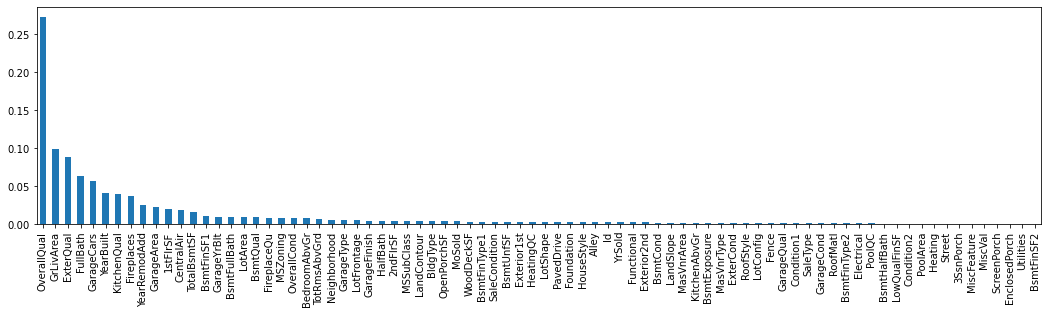

In [491]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X_train,y_train)
#print(model.feature_importances_) 
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(80).plot(kind='bar',figsize=(18,4))
plt.show()

In [497]:
X_train.drop(['HeatingQC','LotShape','PavedDrive','Foundation','HouseStyle','Alley','Id','YrSold','Functional',
'Exterior2nd','BsmtCond','LandSlope','MasVnrArea','KitchenAbvGr','BsmtExposure','MasVnrType','ExterCond',
'RoofStyle','LotConfig','Fence','GarageQual','Condition1','SaleType','GarageCond','RoofMatl','BsmtFinType2',
'Electrical','PoolQC','BsmtHalfBath','LowQualFinSF','Condition2','PoolArea','Heating','Street','3SsnPorch',
'MiscFeature','MiscVal','ScreenPorch','EnclosedPorch','Utilities','BsmtFinSF2'],inplace=True,axis=1)

In [498]:
X_train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LandContour',
       'Neighborhood', 'BldgType', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'Exterior1st', 'ExterQual', 'BsmtQual', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'CentralAir', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'MoSold',
       'SaleCondition'],
      dtype='object')

In [502]:
y_train.columns

Index(['SalePrice'], dtype='object')

In [503]:
dftest.drop(['HeatingQC','LotShape','PavedDrive','Foundation','HouseStyle','Alley','Id','YrSold','Functional',
'Exterior2nd','BsmtCond','LandSlope','MasVnrArea','KitchenAbvGr','BsmtExposure','MasVnrType','ExterCond',
'RoofStyle','LotConfig','Fence','GarageQual','Condition1','SaleType','GarageCond','RoofMatl','BsmtFinType2',
'Electrical','PoolQC','BsmtHalfBath','LowQualFinSF','Condition2','PoolArea','Heating','Street','3SsnPorch',
'MiscFeature','MiscVal','ScreenPorch','EnclosedPorch','Utilities','BsmtFinSF2'],inplace=True,axis=1)

In [509]:
dftest.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LandContour',
       'Neighborhood', 'BldgType', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'Exterior1st', 'ExterQual', 'BsmtQual', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'CentralAir', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'MoSold',
       'SaleCondition'],
      dtype='object')

###### Splitting data into Independent Features and Dependent Features

In [519]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.35, random_state = 440)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(759, 39)
(759, 1)
(409, 39)
(409, 1)


###### Normilization of data

In [520]:
from sklearn.preprocessing import power_transform
X=power_transform(X_train,method='yeo-johnson')
X

array([[ 1.4469594 , -0.16245555,  0.0141029 , ...,  1.33472975,
        -1.71943737,  0.02973497],
       [-1.1674338 , -0.16245555,  1.43213157, ...,  1.33472975,
         1.32061233,  0.02973497],
       [ 0.48770605, -0.16245555,  1.26329098, ...,  1.19848239,
        -0.07674981,  0.02973497],
       ...,
       [ 1.69643982, -0.16245555, -2.34705643, ..., -1.07010964,
         0.28887797,  0.02973497],
       [ 0.7070718 , -2.92646435, -1.1455834 , ...,  0.81367868,
         0.28887797,  0.02973497],
       [ 0.48770605, -0.16245555,  0.0141029 , ...,  0.95428655,
        -0.07674981,  0.02973497]])

###### Standardization

In [521]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
print(x_train)
x_test = sc.fit_transform(x_test)
print(x_test)

[[ 0.38684763 -0.05104627  0.90266745 ...  1.13901645  0.62290059
   0.20088139]
 [ 0.38684763 -0.05104627  1.63824655 ...  1.87753845  1.76030608
   0.20088139]
 [ 1.04695271 -0.05104627  0.20981754 ... -0.97011653  1.38117092
   0.20088139]
 ...
 [-1.09919314 -0.05104627  0.26250826 ... -0.97011653  1.76030608
   0.20088139]
 [-0.59762175  1.56329203  1.9147316  ... -0.00743344 -1.27277522
   0.20088139]
 [-1.09919314 -0.05104627  0.46800966 ...  0.32145837 -0.89364006
   0.20088139]]
[[ 0.383847    0.02983082  0.31137639 ...  0.63298232 -0.11557737
   0.22057177]
 [ 0.383847    0.02983082  0.0958283  ...  0.76504126 -1.55897106
   0.22057177]
 [-1.13156778  0.02983082  0.61887115 ... -0.06362622 -0.11557737
   0.22057177]
 ...
 [ 0.383847    0.02983082  0.86216271 ... -1.01521119 -0.83727422
   0.22057177]
 [ 0.383847    0.02983082  0.31137639 ... -1.01521119 -1.19812264
   0.22057177]
 [-1.13156778  0.02983082  0.15056432 ...  0.98085027  0.60611948
   0.22057177]]


###### Model Building

In [523]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,LassoCV,RidgeCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor,AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.metrics import mean_absolute_error, accuracy_score
from sklearn.model_selection import RandomizedSearchCV, cross_val_score

LinearRegression() -Actual vs Predicted


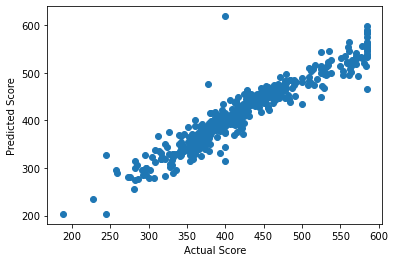

Lasso() -Actual vs Predicted


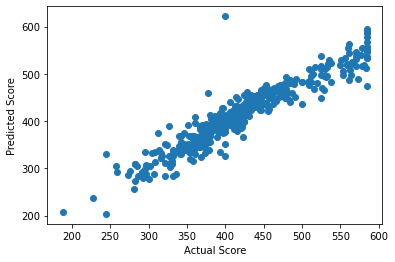

LassoCV() -Actual vs Predicted


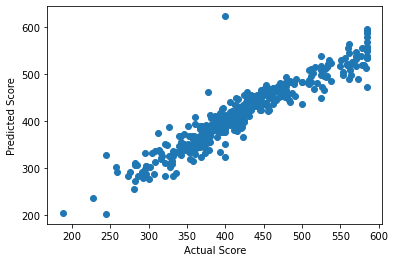

Ridge() -Actual vs Predicted


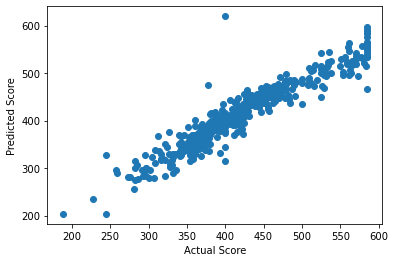

RidgeCV(alphas=array([ 0.1,  1. , 10. ])) -Actual vs Predicted


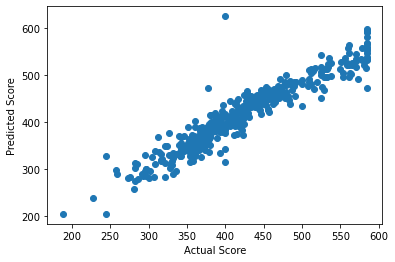

DecisionTreeRegressor() -Actual vs Predicted


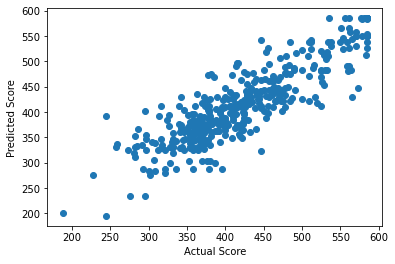

KNeighborsRegressor() -Actual vs Predicted


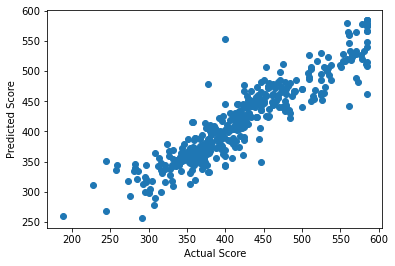

RandomForestRegressor() -Actual vs Predicted


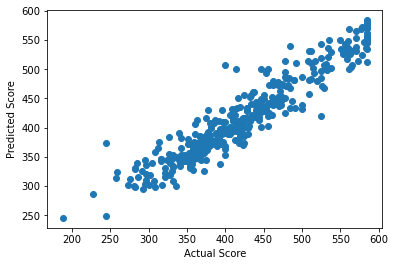

GradientBoostingRegressor() -Actual vs Predicted


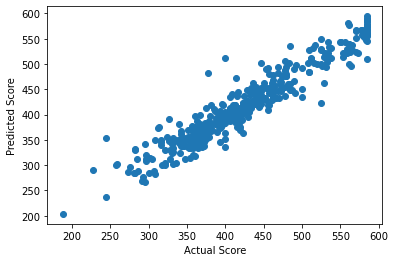

AdaBoostRegressor() -Actual vs Predicted


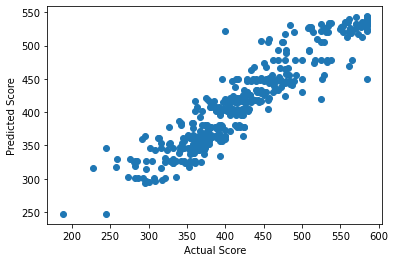

In [524]:
models=[]
models1 = []

Z = [LinearRegression(), Lasso(), LassoCV() ,Ridge(), RidgeCV() ,DecisionTreeRegressor(),
     KNeighborsRegressor() ,RandomForestRegressor() , GradientBoostingRegressor(),AdaBoostRegressor()] 
X = ["LinearRegression", "Lasso", "LassoCV" ,"Ridge", "RidgeCV" ,"DecisionTreeRegressor",
     "KNeighborsRegressor" ,"RandomForestRegressor" ,"GradientBoostingRegressor" ,"AdaBoostRegressor"]
for i in range(0,len(Z)):
    model = Z[i]
    model=model.fit( x_train , y_train )
    pred = model.predict(x_test)
    models.append(y_test)
    models1.append(pred)
    plt.scatter(y_test,pred)
    plt.xlabel('Actual Score')
    plt.ylabel('Predicted Score')
    print(model,'-Actual vs Predicted')
    plt.show()

###### Evaluation

In [525]:
#Evaluation
models2=[]
models3 = []
models6=[]
models7=[]
models8=[]

Z = [LinearRegression(), Lasso(), LassoCV() ,Ridge(), RidgeCV() ,DecisionTreeRegressor(),
     KNeighborsRegressor() ,RandomForestRegressor() , GradientBoostingRegressor(),AdaBoostRegressor()] 
X = ["LinearRegression", "Lasso", "LassoCV" ,"Ridge", "RidgeCV" ,"DecisionTreeRegressor",
     "KNeighborsRegressor" ,"RandomForestRegressor" ,"GradientBoostingRegressor" ,"AdaBoostRegressor"]
for i in range(0,len(Z)):
    model = Z[i]
    model=model.fit( x_train , y_train )
    pred = model.predict(x_test)
    print(model)
    r2_score_train =model.score(x_train, y_train)
    models2.append(r2_score_train)
    print('r2 Score On Train Data:',r2_score_train)
    r2_score_test=model.score(x_test,y_test)
    models3.append(r2_score_test)
    print('r2 Score On Test Data:',r2_score_test)
    models8.append(metrics.mean_absolute_error(y_test, pred))
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred))
    models6.append(metrics.mean_squared_error(y_test, pred))
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred))
    models7.append(np.sqrt(metrics.mean_squared_error(y_test, pred)))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred)),"\n")
   

LinearRegression()
r2 Score On Train Data: 0.891248773517782
r2 Score On Test Data: 0.8835520623812365
Mean Absolute Error: 18.825909845955554
Mean Squared Error: 742.1281410142043
Root Mean Squared Error: 27.24202894452255 

Lasso()
r2 Score On Train Data: 0.8875093078947097
r2 Score On Test Data: 0.8821158610148785
Mean Absolute Error: 18.92191136698888
Mean Squared Error: 751.2811193488385
Root Mean Squared Error: 27.409507827555725 

LassoCV()
r2 Score On Train Data: 0.8884742102635284
r2 Score On Test Data: 0.882999465187525
Mean Absolute Error: 18.84663816028243
Mean Squared Error: 745.6498687191754
Root Mean Squared Error: 27.306590206746346 

Ridge()
r2 Score On Train Data: 0.8912364387121084
r2 Score On Test Data: 0.883612740495028
Mean Absolute Error: 18.80312192733656
Mean Squared Error: 741.7414365631925
Root Mean Squared Error: 27.23493044902433 

RidgeCV(alphas=array([ 0.1,  1. , 10. ]))
r2 Score On Train Data: 0.8907310910371178
r2 Score On Test Data: 0.883353873816872
M

###### Validation

In [528]:
#validation
models4=[]
models5 = []

Z = [LinearRegression(), Lasso(), LassoCV() ,Ridge(), RidgeCV() ,DecisionTreeRegressor(),
     KNeighborsRegressor() ,RandomForestRegressor() , GradientBoostingRegressor(),AdaBoostRegressor()] 
X = ["LinearRegression", "Lasso", "LassoCV" ,"Ridge", "RidgeCV" ,"DecisionTreeRegressor",
     "KNeighborsRegressor" ,"RandomForestRegressor" ,"GradientBoostingRegressor" ,"AdaBoostRegressor"]
for i in range(0,len(Z)):
    model = Z[i]
    model=model.fit( x_train , y_train )
    pred = model.predict(x_test)
    print(model)
    scores = cross_val_score(model,x_train, y_train, cv=5)
    print('Cross Validation')
    models4.append(scores)
    print(model,' Score:',scores)
    models4.append(round(scores.mean(),3))
    print('Average ',model, 'score:',round(scores.mean(),3),"\n")

LinearRegression()
Cross Validation
LinearRegression()  Score: [0.89055592 0.90753297 0.80646179 0.86974355 0.88877909]
Average  LinearRegression() score: 0.873 

Lasso()
Cross Validation
Lasso()  Score: [0.88766525 0.90593794 0.8203886  0.8685672  0.89277755]
Average  Lasso() score: 0.875 

LassoCV()
Cross Validation
LassoCV()  Score: [0.88949989 0.90658879 0.81600101 0.86859627 0.89310563]
Average  LassoCV() score: 0.875 

Ridge()
Cross Validation
Ridge()  Score: [0.89074481 0.90748525 0.80627625 0.86951718 0.88963498]
Average  Ridge() score: 0.873 

RidgeCV(alphas=array([ 0.1,  1. , 10. ]))
Cross Validation
RidgeCV(alphas=array([ 0.1,  1. , 10. ]))  Score: [0.89112403 0.90691361 0.80686416 0.86741465 0.89287436]
Average  RidgeCV(alphas=array([ 0.1,  1. , 10. ])) score: 0.873 

DecisionTreeRegressor()
Cross Validation
DecisionTreeRegressor()  Score: [0.67470006 0.74659295 0.67345234 0.66367046 0.6936417 ]
Average  DecisionTreeRegressor() score: 0.69 

KNeighborsRegressor()
Cross Vali

In [535]:
algorithms = {
    'DecisionTreeRegressor' : {
        'model' : DecisionTreeRegressor(),
        'param' : {
            'criterion' : ['mse','friedman_mse','mae','poisson'],
            'splitter' : ['best','random'],
            'max_depth' : [2,4,6,8,10,12],
            'min_samples_split' : [0.0, 1.0],
            'min_samples_leaf' : [1,0.5],
            'min_weight_fraction_leaf' : [0, 0.5],
            'max_features' : ['auto','sqrt','log2'],
            'ccp_alpha' : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
            'max_leaf_nodes' : [4,6,12,10,25,50]
        }
    },
    'LogisticRegression' : {
        'model' : LinearRegression(),
        'param' : {
            'fit_intercept' : [True,False],
            'normalize' : [True,False],
            'copy_X' : [True,False],
            'positive' : [True,False],
            'n_jobs' : [1,5,10, 100,200,500]
         }
    },
    'Lasso' : {
        'model' : Lasso(),
        'param' : {
            'alpha' : [0.0001, 0.001, 0.01, 0.1, 1.009, 10.006, 2.00, 5000.09],
            'fit_intercept' : [True,False],
            'normalize' : [True,False],
            'precompute' : [True,False],
            'copy_X' : [True,False],
            'max_iter' : [10, 50,5,90, 200, 110, 500, 1000],
            'positive' : [True,False],
            'random_state' : [1,5,10, 100,200,500],
            'selection' : ['cyclic','random']
         }
    },
    'LassoCV' : {
        'model' : LassoCV(),
        'param' : {
            'max_iter' : [2,5,10],
            'eps' : [.0001,.01],
            'cv' : [2,5,7],
            'positive' : [True,False],
            'n_jobs' : [1,3,5,9,10]
         }
    },
    'Ridge' : {
        'model' : Ridge(),
        'param' : {
            'alpha' : [1.2,2.3],
            'fit_intercept' : [True,False],
            'normalize' : [True,False],
            'copy_X' : [True,False],
            'max_iter' : [10, 50,5,90, 200, 110, 500, 1000],
            'solver' : ['auto','svd','cholesky','lsqr','sparse_cg','sag','saga'],
            'random_state' : [1,5,10, 100,200,500]
        }
    },
    'KNeighborsRegressor' : {
        'model' : KNeighborsRegressor(),
        'param' : {
            'n_neighbors' : [1,5,4,10,30,15,20,100],
            'weights' : ['uniform','distance'],
            'algorithm' : ['auto','ball_tree','kd_tree','brute'],
            'leaf_size' : [1,2,4,6,12,10,25,50],
            'p' : [1,2,5,7,10,20,24],
            'n_jobs' : [1,5,10, 100,200,500]
        }
    },
    'RandomForestRegressor' : {
        'model' : RandomForestRegressor(),
        'param' : {
            'n_estimators' : [10, 50,5,90, 200, 110, 500],
            'criterion' : ['mse','mae'],
            'max_depth' : [2,4,6,8,10],
            'min_samples_split' : [0.0, 1.0],
            'min_samples_leaf' : [0, 0.5],
            'min_weight_fraction_leaf' : [0, 0.5],
            'max_features' : ['auto','sqrt','log2'],
            'max_leaf_nodes' : [4,6,12,10,25,50],
            'verbose' : [1,5,4,10,15],
            'random_state' : [1,5,10, 100,200,500],
            'n_jobs' : [1,5,10, 100,200]
        }
    },
    'GradientBoostingRegressor' : {
        'model' : GradientBoostingRegressor(),
        'param' : {
           'loss' : ['ls','lad','huber','quantile'],
           'learning_rate' : [.001,.04,.05,0.6,1,1.2,0.5],
           'n_estimators' : [23,45,60,69,98],
           'subsample' : [0,1],
           'criterion' : ['friedman_mse','mse','mae'],
           'min_samples_split' : [0.0, 1.0],
           'min_samples_leaf' : [0, 0.5],
           'min_weight_fraction_leaf' : [0, 0.5],
           'random_state' : [1,5,10, 100,200,500],
           'max_features' : ['auto','sqrt','log2'],
           'verbose' : [1,5,4,10,30,15,20,100]
        }
    },
    'AdaBoostRegressor' : {
        'model' : AdaBoostRegressor(),
        'param' : {
            'n_estimators' : [2,4,6,8,10,12],
            'learning_rate' : [1.5,3.4,5.6,9.2,10.2],
            'random_state' : [1,5,10, 100,200,500],
            'loss' : ['linear','square','exponential']
        }
    }
}

In [536]:
score = []
for name, mp in algorithms.items() :
    rs = RandomizedSearchCV(estimator = mp['model'], param_distributions = mp['param'], cv = 10, n_jobs=-1, verbose=3)
    rs.fit(x_train, y_train)
    score.append({'model': name,'score' : rs.best_score_,'params' : rs.best_params_})  

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  15 tasks      | elapsed:    0.0s


building tree 1 of 110building tree 2 of 110
building tree 3 of 110

building tree 4 of 110building tree 5 of 110
building tree 6 of 110
building tree 7 of 110
building tree 8 of 110
building tree 9 of 110building tree 10 of 110
building tree 11 of 110


building tree 12 of 110building tree 13 of 110
building tree 14 of 110building tree 15 of 110


building tree 16 of 110building tree 17 of 110

building tree 18 of 110
building tree 19 of 110building tree 20 of 110
building tree 21 of 110building tree 22 of 110


building tree 23 of 110
building tree 24 of 110
building tree 25 of 110
building tree 26 of 110building tree 27 of 110

building tree 28 of 110
building tree 29 of 110building tree 30 of 110building tree 31 of 110

building tree 32 of 110

building tree 33 of 110building tree 34 of 110building tree 35 of 110
building tree 36 of 110

building tree 37 of 110

building tree 38 of 110building tree 39 of 110

building tree 40 of 110
building tree 41 of 110building tree 42 of 110

b

[Parallel(n_jobs=5)]: Done  88 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Done 110 out of 110 | elapsed:    0.1s finished


building tree 96 of 110
building tree 97 of 110

building tree 98 of 110building tree 99 of 110building tree 100 of 110
building tree 101 of 110

building tree 102 of 110building tree 103 of 110building tree 104 of 110

building tree 105 of 110
building tree 106 of 110


building tree 107 of 110
building tree 108 of 110building tree 109 of 110
building tree 110 of 110

Fitting 10 folds for each of 10 candidates, totalling 100 fits
      Iter       Train Loss   Remaining Time 
         1          60.4246            0.19s
         2          60.4246            0.24s
         3          60.4246            0.22s
         4          60.4246            0.21s
         5          60.4246            0.20s
         6          60.4246            0.20s
         7          60.4246            0.21s
         8          60.4246            0.20s
         9          60.4246            0.20s
        10          60.4246            0.19s
        11          60.4246            0.20s
        12          60.4

In [537]:
final=pd.DataFrame(score,columns=['model','score','params'])
final

model     score  \
0      DecisionTreeRegressor  0.291227   
1         LogisticRegression  0.871540   
2                      Lasso  0.871922   
3                    LassoCV  0.869953   
4                      Ridge  0.841911   
5        KNeighborsRegressor  0.842421   
6      RandomForestRegressor -0.014784   
7  GradientBoostingRegressor  0.021718   
8          AdaBoostRegressor  0.792164   

                                              params  
0  {'splitter': 'best', 'min_weight_fraction_leaf...  
1  {'positive': False, 'normalize': True, 'n_jobs...  
2  {'selection': 'cyclic', 'random_state': 100, '...  
3  {'positive': False, 'n_jobs': 5, 'max_iter': 1...  
4  {'solver': 'cholesky', 'random_state': 10, 'no...  
5  {'weights': 'distance', 'p': 1, 'n_neighbors':...  
6  {'verbose': 4, 'random_state': 1, 'n_jobs': 5,...  
7  {'verbose': 20, 'subsample': 1, 'random_state'...  
8  {'random_state': 1, 'n_estimators': 10, 'loss'...

###### Final Model

Choosing the Lasso as Final Model Because Avg Accuray and hyperparameter score is high

###### Retraining the Model

In [538]:
y_train=df[['SalePrice']]
X_train=df.drop(['SalePrice'],axis=1)

In [539]:
PScaler=StandardScaler()
PScalerFit=PScaler.fit(X_train)

x_train=PScalerFit.transform(X_train)

print("x_train :",x_train.shape)
print("y_train :",y_train.shape)

x_train : (1168, 80)
y_train : (1168, 1)


In [543]:
clf = Lasso(selection= 'cyclic', random_state= 100, alpha =2.00, fit_intercept =True,
            normalize =False, precompute =True,copy_X=True,max_iter= 50,positive=False)

finalRF=clf.fit(x_train,y_train)
print("Accuracy :", finalRF.score(x_train, y_train))

Accuracy : 0.8985411874072272


###### Model Saving

In [545]:
import pickle
filename='PFAHousing.pk1'
pickle.dump(model,open(filename,'wb'))
print("Model Saved")

Model Saved
